In [1]:
%load_ext autoreload
%autoreload 2

import awkward as ak
import numpy as np
from particle import Particle

from python.analysis import cross_section, Fitting, Tags, vector
from python.analysis import Plots, Master, SelectionTools
from rich import print

def track_length(trajectory_points, threshold = int(2E5)):
    if ak.num(trajectory_points, 0) > threshold:
        n_chunks =  ak.num(trajectory_points, 0) // threshold
        trk_len = []
        for i in range(n_chunks + 1):
            chunk = trajectory_points[i*threshold:(i+1)*threshold]
            trk_len.append(ak.sum(vector.dist(chunk[:, 1:], chunk[:, :-1]), axis = -1))
        trk_len = ak.concatenate(trk_len)
    else:
        trk_len = ak.sum(vector.dist(trajectory_points[:, 1:], trajectory_points[:, :-1]), axis = -1)
    return trk_len

In [2]:
config = "work/2023/cex_analysis_2GeV_config.json"
args = cross_section.ApplicationArguments.ResolveConfig(cross_section.LoadConfiguration(config))
print(vars(args))
cross_section.SetPlotStyle(True, dpi = 100)

{
    'mc_file': 
'/home/sb16165/Documents/pi0-analysis/analysis/work/ROOTFiles/PDSPAnalyser/PDSPProd4a_MC_2GeV_reco1_sce_datadriven_
v1_ntuple_v09_41_00_03.root',
    'data_file': 
'/home/sb16165/Documents/pi0-analysis/analysis/work/ROOTFiles/PDSPAnalyser/PDSPProd4_data_2GeV_reco2_ntuple_v09_42_
03_01.root',
    'ntuple_type': 'PDSPAnalyser',
    'mc_beam_quality_fit': {
        'mu_x': -30.64933296795492,
        'mu_y': 422.3169215500528,
        'mu_z': 0.1059250445152803,
        'sigma_x': 4.397563500425448,
        'sigma_y': 3.767586484419336,
        'sigma_z': 0.1999284779311936,
        'mu_dir_x': -0.16371231996302327,
        'mu_dir_y': -0.16272523516437884,
        'mu_dir_z': 0.8754531459561035,
        'mu_err_x': 0.022966518863990294,
        'mu_err_y': 0.015228003766506053,
        'mu_err_z': 0.000834226291678249,
        'sigma_err_x': 0.020029441299053513,
        'sigma_err_y': 0.013302720437142182,
        'sigma_err_z': 0.0007010527171278086,
        'mu_dir_err_x': 0.0006915631741301451,
        'mu_dir_err_y': 0.001068705402913383,
        'mu_dir_err_z': 0.0006651870698590503
    },
    'data_beam_quality_fit': {
        'mu_x': -27.76857419133848,
        'mu_y': 424.6628055823738,
        'mu_z': 4.00799684495873,
        'sigma_x': 4.3348975668055685,
        'sigma_y': 4.7448463221515365,
        'sigma_z': 1.149425797433293,
        'mu_dir_x': -0.14359093226653474,
        'mu_dir_y': -0.19334509071952846,
        'mu_dir_z': 0.8634907774608025,
        'mu_err_x': 0.013427465777139418,
        'mu_err_y': 0.012931209573248698,
        'mu_err_z': 0.0031923209441996852,
        'sigma_err_x': 0.011336317544860287,
        'sigma_err_y': 0.01128324485680001,
        'sigma_err_z': 0.002910436992341441,
        'mu_dir_err_x': 0.0004213028678783807,
        'mu_dir_err_y': 0.0006937108574706536,
        'mu_dir_err_z': 0.000431517116186705
    },
    'mc_beam_scraper_fit': {
        '0': {'bins': [1500.0, 1700.0], 'mu': -20.498463150094196, 'sigma': 32.60281185771283},
        '1': {'bins': [1700.0, 1900.0], 'mu': -5.185852549549711, 'sigma': 37.091532648635344},
        '2': {'bins': [1900.0, 2100.0], 'mu': 12.46485620219921, 'sigma': 40.830867236868144},
        '3': {'bins': [2100.0, 2300.0], 'mu': 52.973019985581686, 'sigma': 35.94230889560537}
    },
    'norm': 2.78,
    'norm_area': True,
    'correction': 'response',
    'correction_params': 
'/home/sb16165/Documents/pi0-analysis/analysis/work/2023/PDSPProd4a_MC_2GeV_reco1_sce_datadriven_v1_ntuple_v09_41_0
0_03/shower_energy_correction/gaussian.json',
    'UPSTREAM_ENERGY_LOSS': {
        'bins': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200],
        'correction_params': 
'/home/sb16165/Documents/pi0-analysis/analysis/work/2023/PDSPProd4a_MC_2GeV_reco1_sce_datadriven_v1_ntuple_v09_41_0
0_03/upstream_loss/fit_parameters.json'
    },
    'beam_selection': {
        'selections': {
            'PiBeamSelection': <function PiBeamSelection at 0x7fce3043cee0>,
            'CaloSizeCut': <function CaloSizeCut at 0x7fce3043e680>,
            'PandoraTagCut': <function PandoraTagCut at 0x7fce3043e5f0>,
            'DxyCut': <function DxyCut at 0x7fce3043e830>,
            'DzCut': <function DzCut at 0x7fce3043e8c0>,
            'CosThetaCut': <function CosThetaCut at 0x7fce3043e950>,
            'APA3Cut': <function APA3Cut at 0x7fce3043e9e0>,
            'MichelScoreCut': <function MichelScoreCut at 0x7fce3043ea70>,
            'MedianDEdXCut': <function MedianDEdXCut at 0x7fce3043eb00>,
            'BeamScraperCut': <function BeamScraperCut at 0x7fce3043eb90>
        },
        'mc_arguments': {
            'PiBeamSelection': {'use_beam_inst': False},
            'CaloSizeCut': {},
            'PandoraTagCut': {'cut': 13},
            'DxyCut': {
                'cut': 3,
                'fits': {
                    'mu_x': -30.64933296795492,
                    'mu_y': 422.3169215500528,
                    'mu_z': 0.1059250445152803,
  

In [3]:
samples = {
    "mc" : Master.Data(args.mc_file, -1, nTuple_type = Master.Ntuple_Type(args.ntuple_type)),
    "data" : Master.Data(args.data_file, -1, nTuple_type = Master.Ntuple_Type(args.ntuple_type))
}
# beam_mask = {
#     "mc" : SelectionTools.CombineSelections(samples["mc"], args.beam_selection["selections"].values(), 0, args.beam_selection["mc_arguments"].values()),
#     "data" : SelectionTools.CombineSelections(samples["data"], args.beam_selection["selections"].values(), 0, args.beam_selection["data_arguments"].values())
# }

In [4]:
def ComputeQuantities():
    reco_upstream_loss = {s : cross_section.UpstreamEnergyLoss(cross_section.KE(samples[s].recoParticles.beam_inst_P, cross_section.Particle.from_pdgid(211).mass), cross_section.LoadConfiguration(args.UPSTREAM_ENERGY_LOSS["correction_params"])["value"]) for s in samples}
    reco_KE_ff = {s : cross_section.KE(samples[s].recoParticles.beam_inst_P, Particle.from_pdgid(211).mass) - reco_upstream_loss[s] for s in samples}
    reco_KE_int = {s : reco_KE_ff[s] - cross_section.RecoDepositedEnergy(samples[s], reco_KE_ff[s], "bb") for s in samples}
    reco_track_length = {s : track_length(samples[s].recoParticles.beam_calo_pos) for s in samples}

    return {
        "KE_ff" : reco_KE_ff,
        "KE_int" : reco_KE_int,
        "track_length" : reco_track_length,
    }

quantities = ComputeQuantities()

/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in power
  result = getattr(ufunc, method)(
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(


no selection

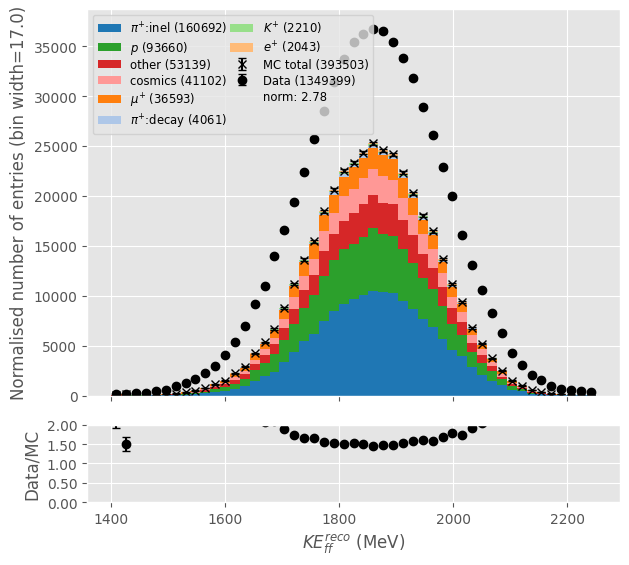

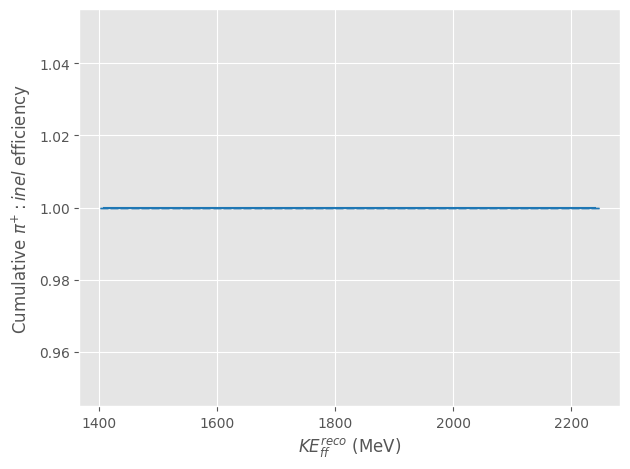

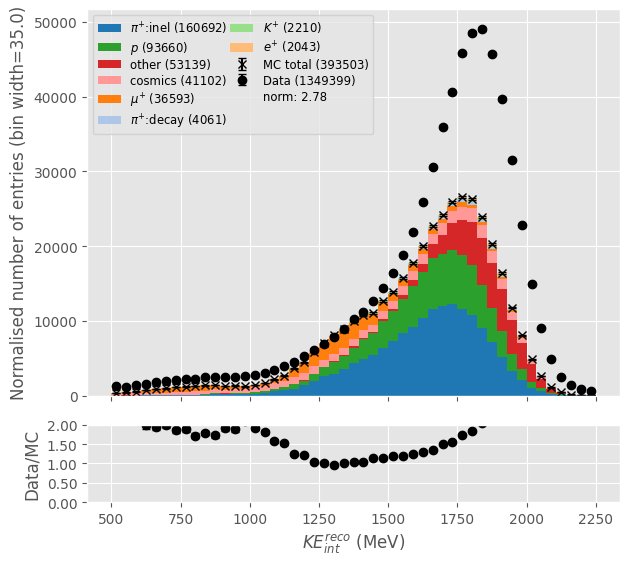

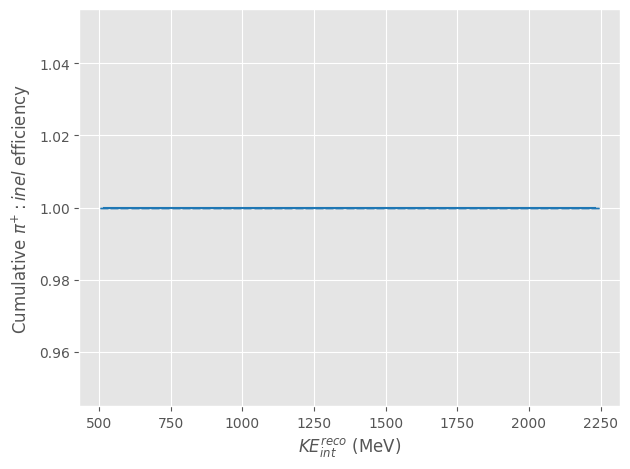

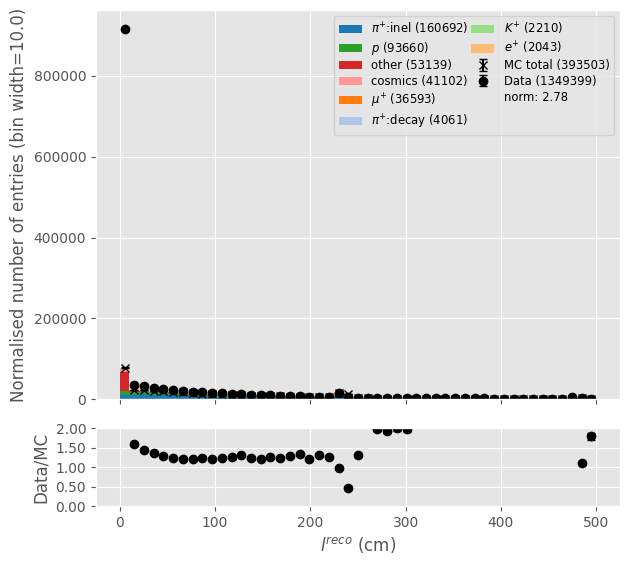

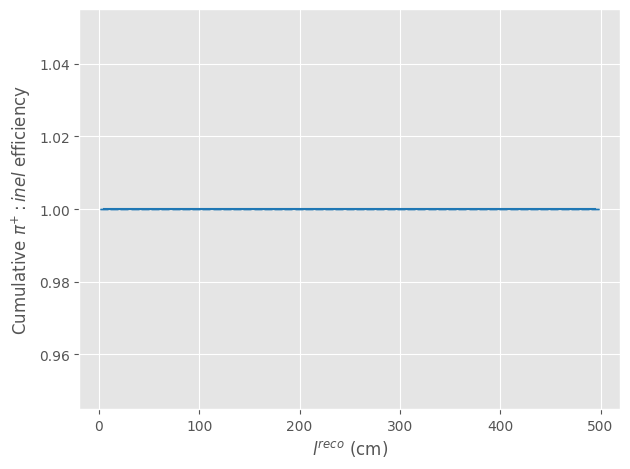

PiBeamSelection <function PiBeamSelection at 0x7fce3043cee0>

mc 141548 102443

data 1349399 285238

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")


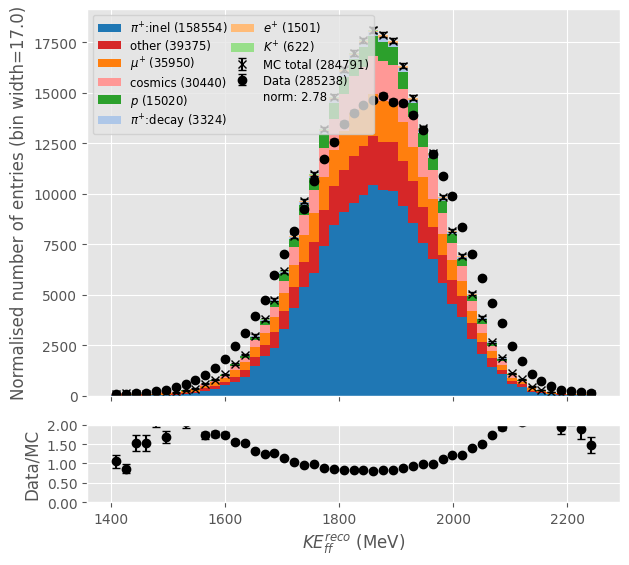

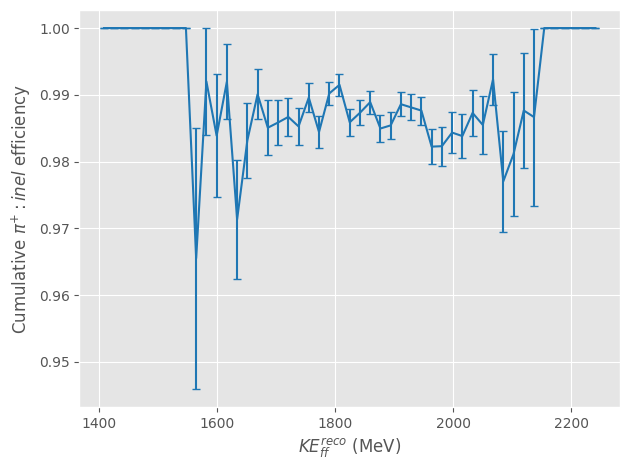

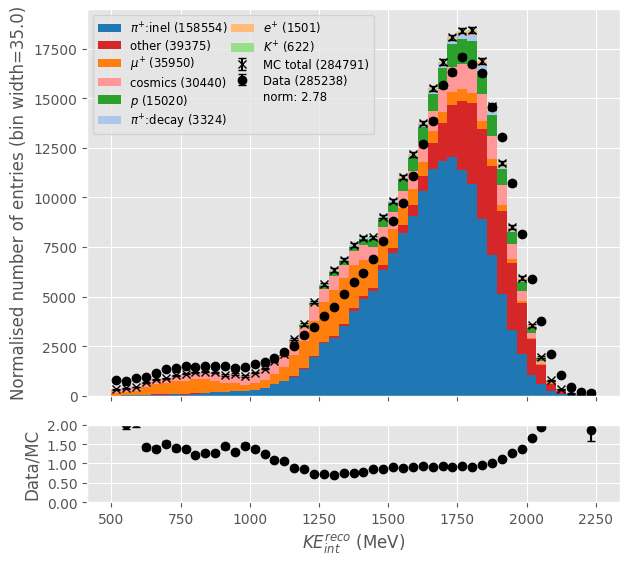

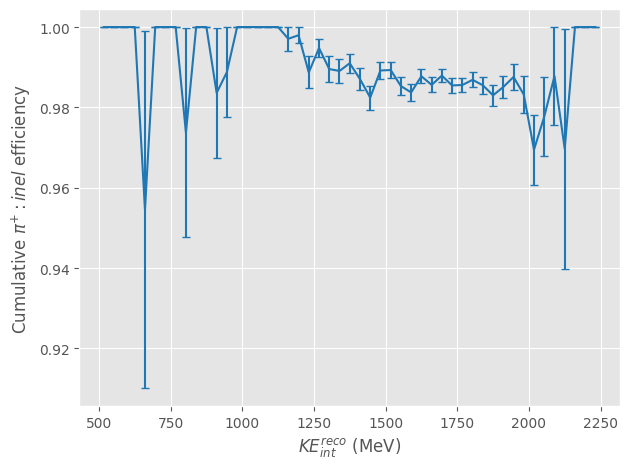

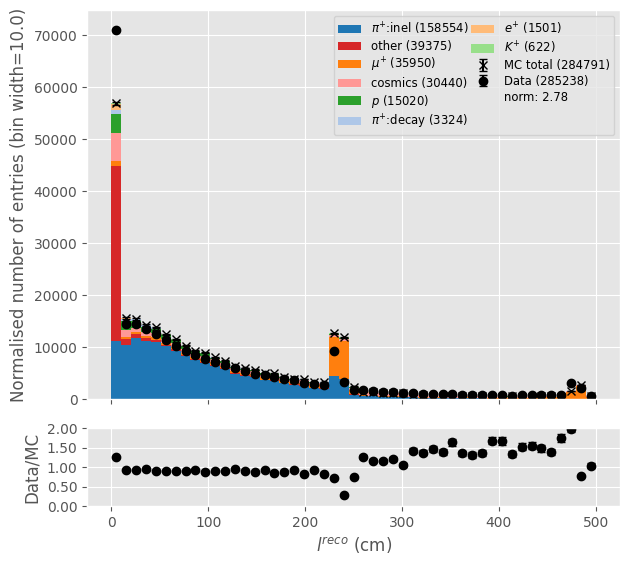

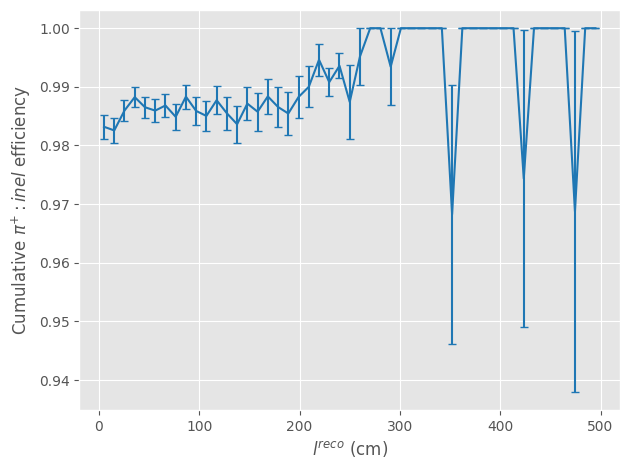

CaloSizeCut <function CaloSizeCut at 0x7fce3043e680>

mc 102443 91248

data 285238 248398

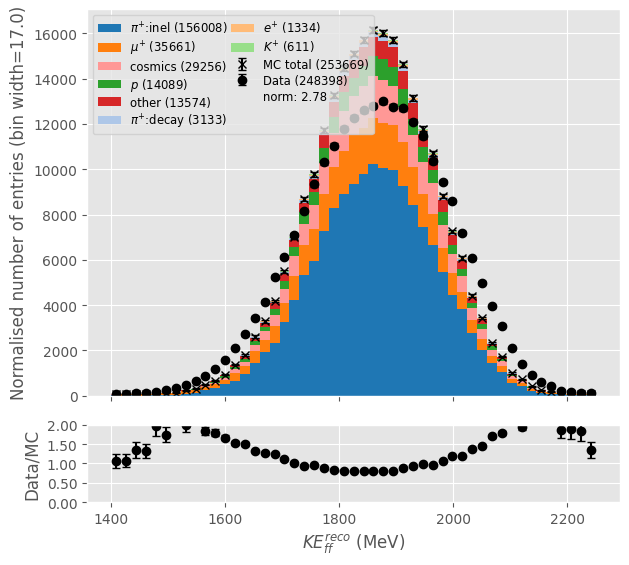

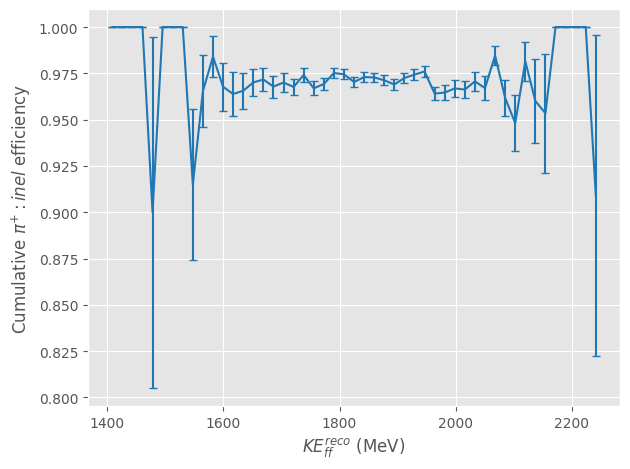

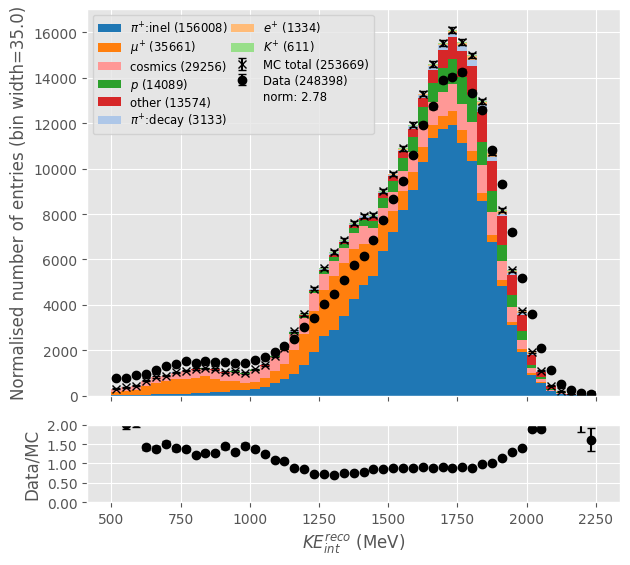

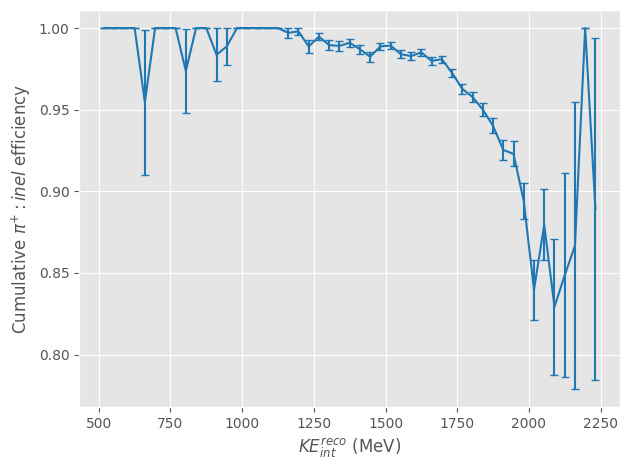

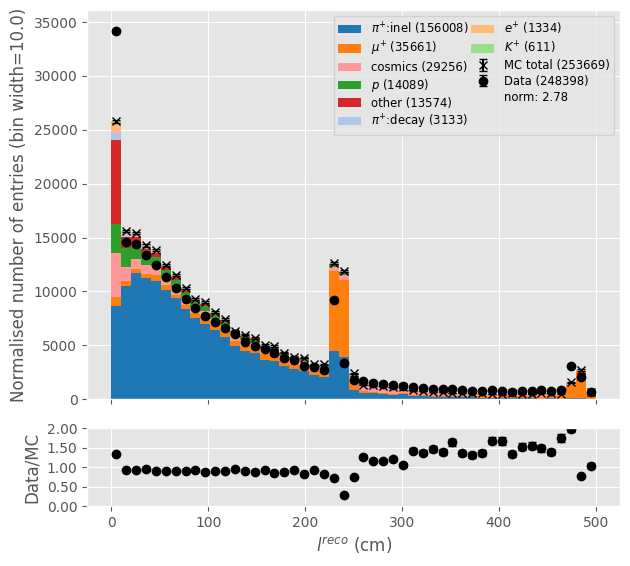

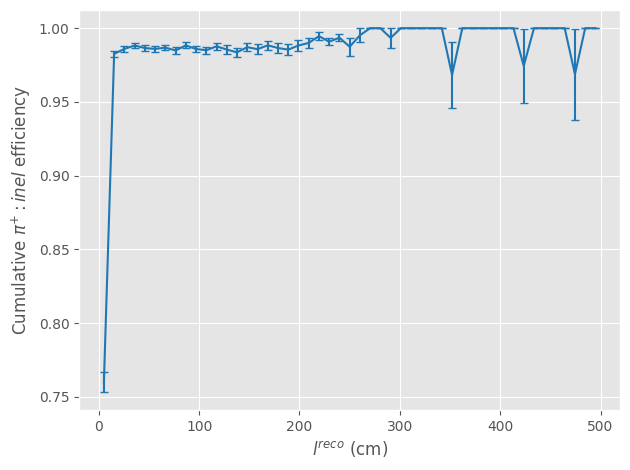

PandoraTagCut <function PandoraTagCut at 0x7fce3043e5f0>

mc 91248 87403

data 248398 232423

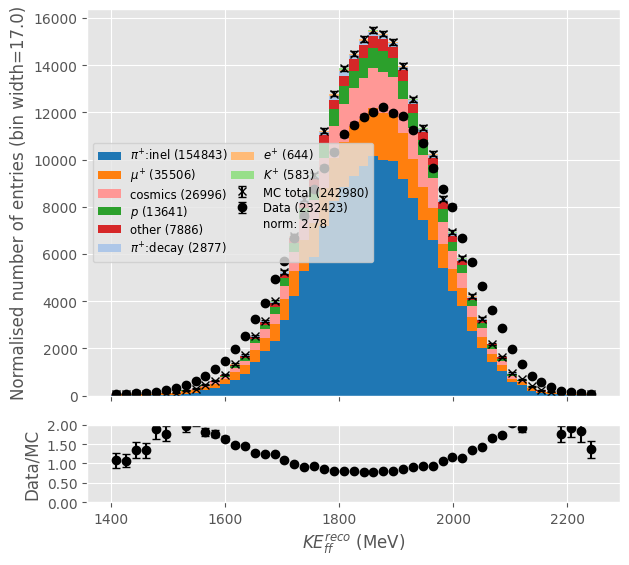

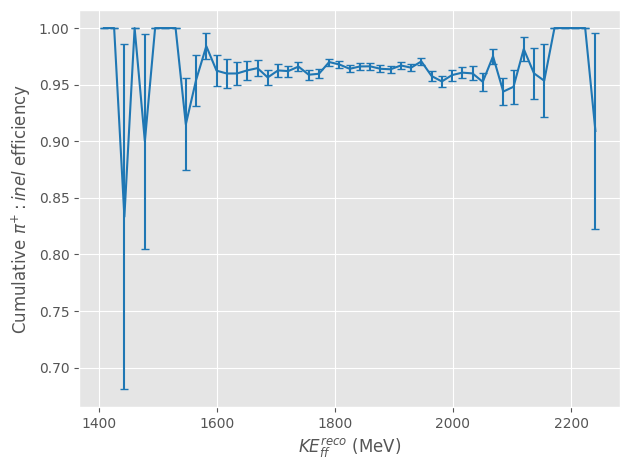

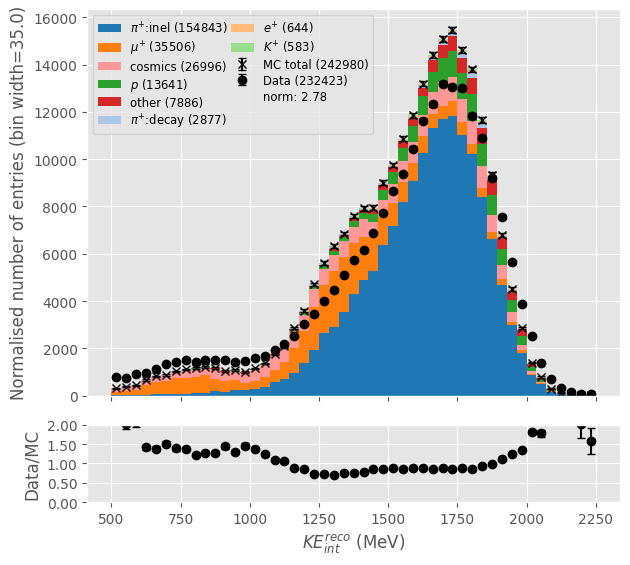

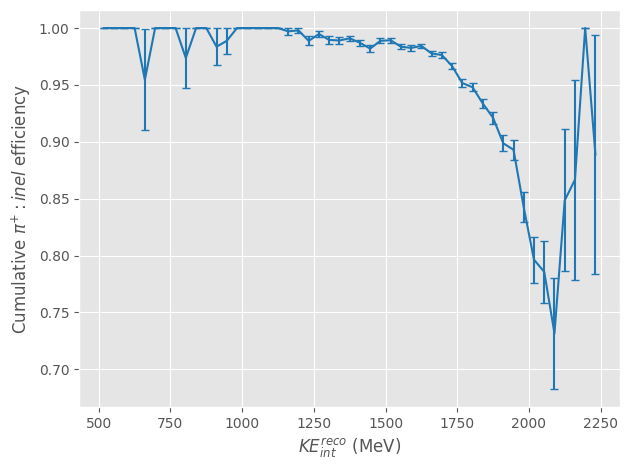

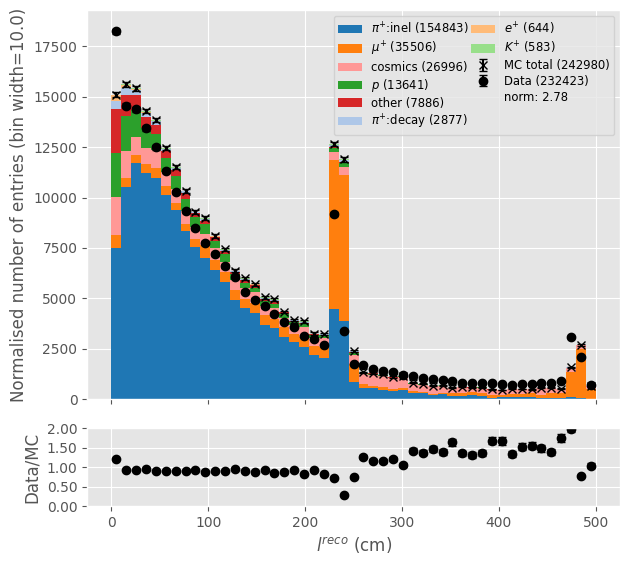

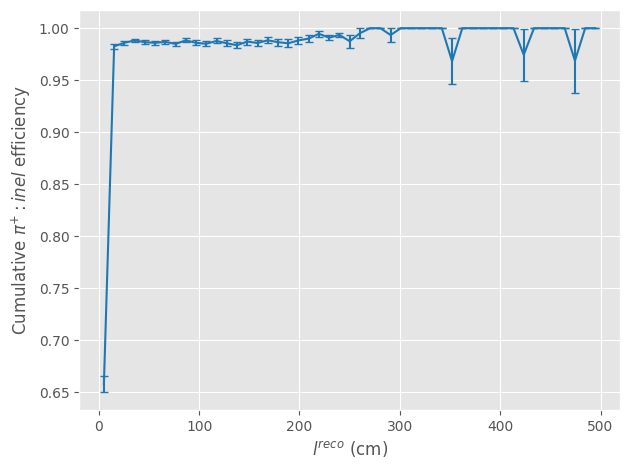

DxyCut <function DxyCut at 0x7fce3043e830>

mc 87403 68150

data 232423 181810

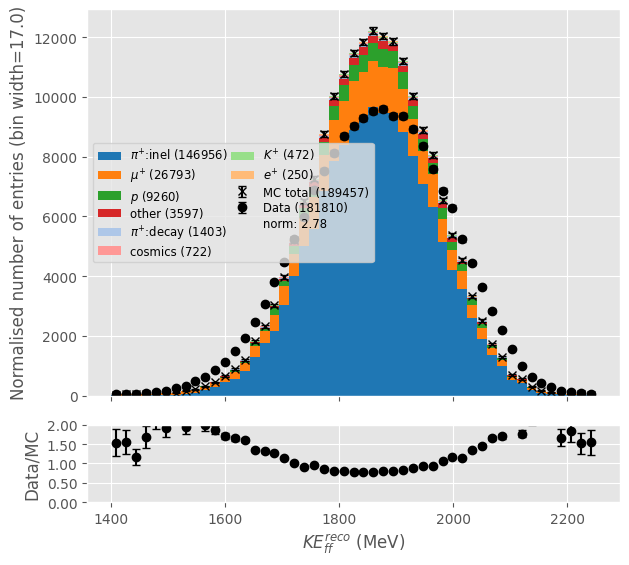

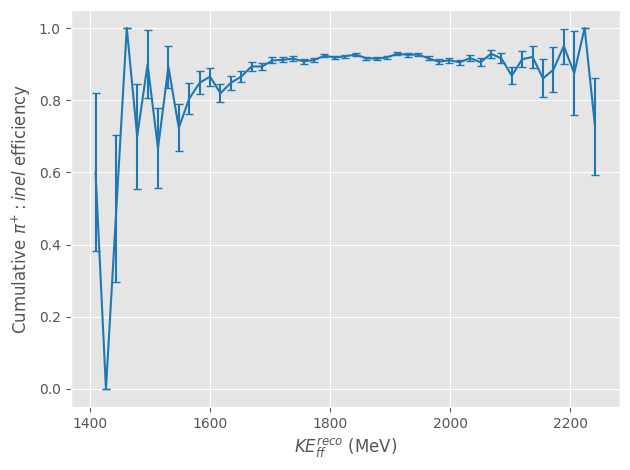

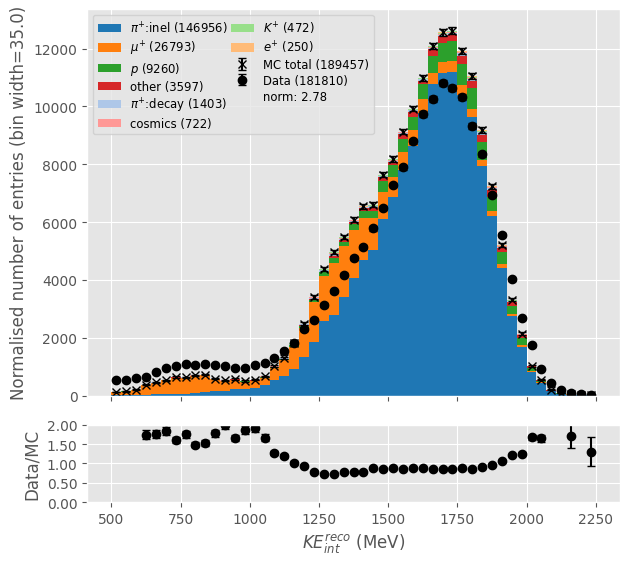

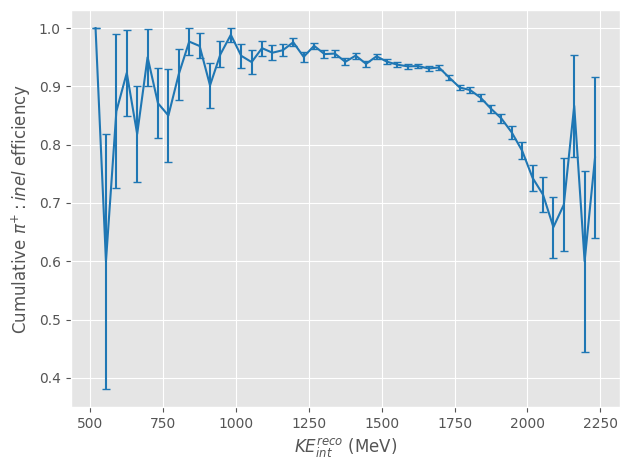

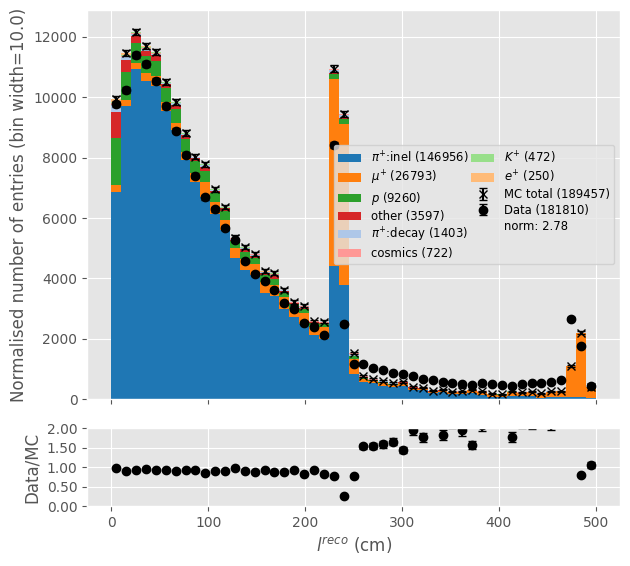

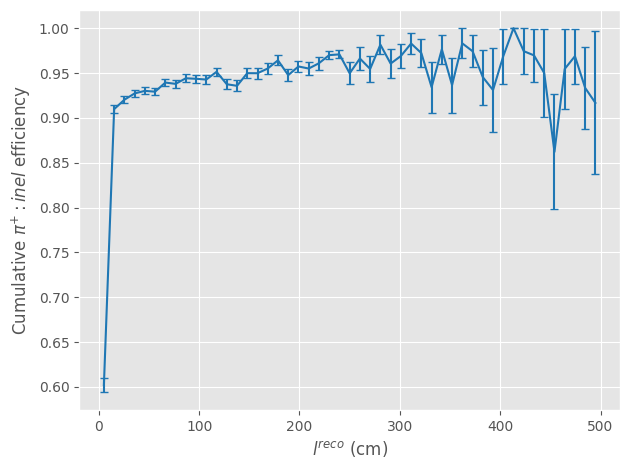

DzCut <function DzCut at 0x7fce3043e8c0>

mc 68150 62438

data 181810 174422

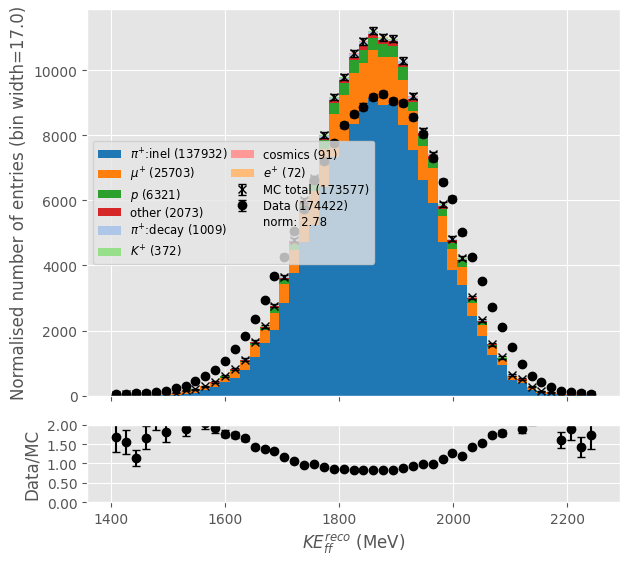

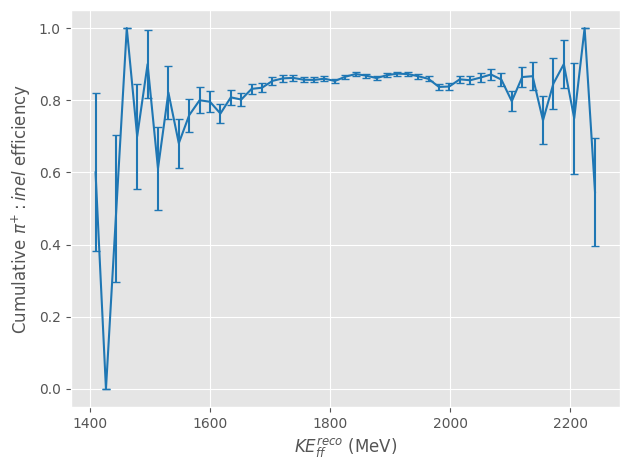

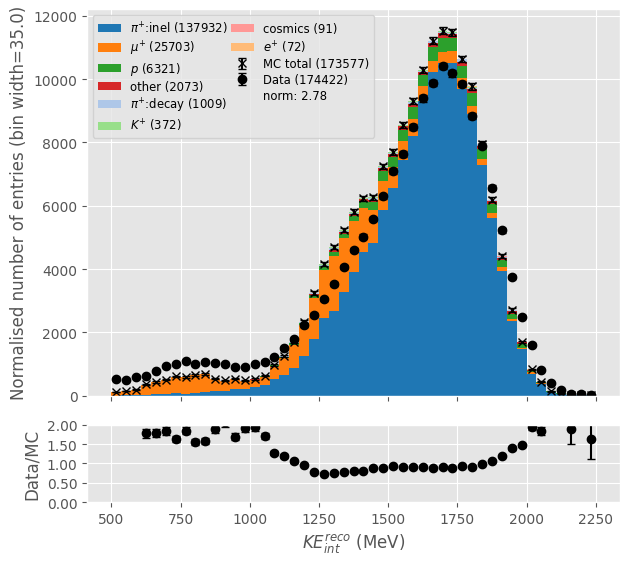

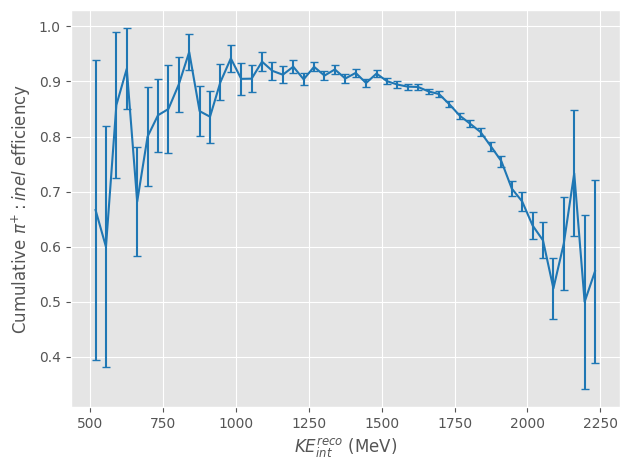

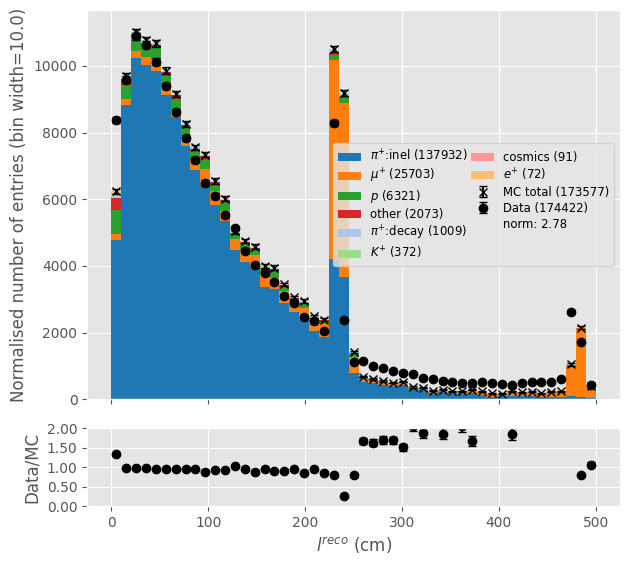

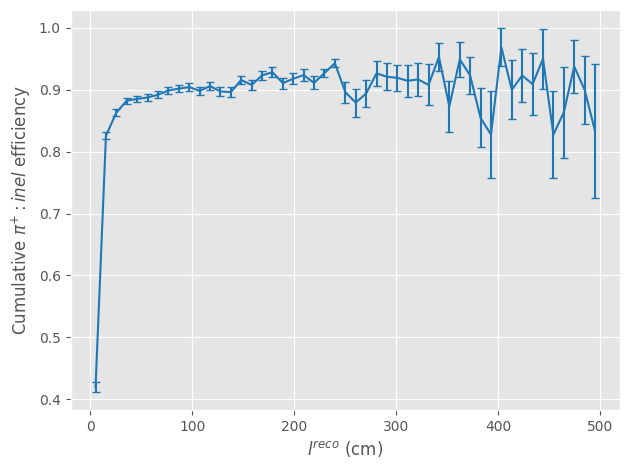

CosThetaCut <function CosThetaCut at 0x7fce3043e950>

mc 62438 59985

data 174422 162761

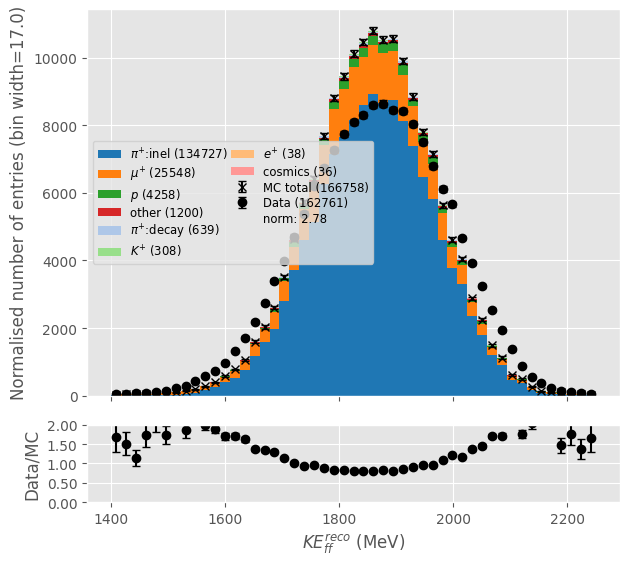

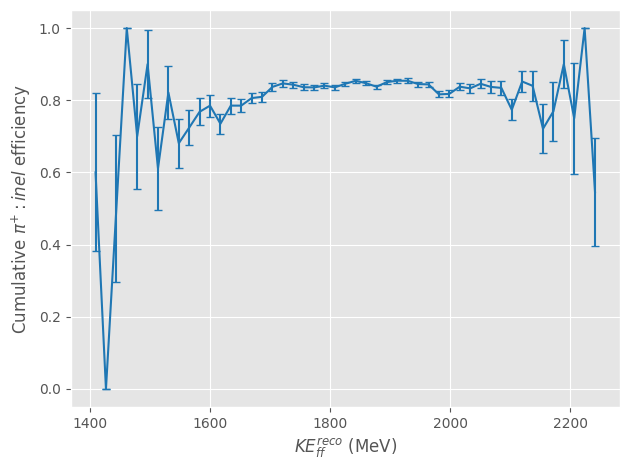

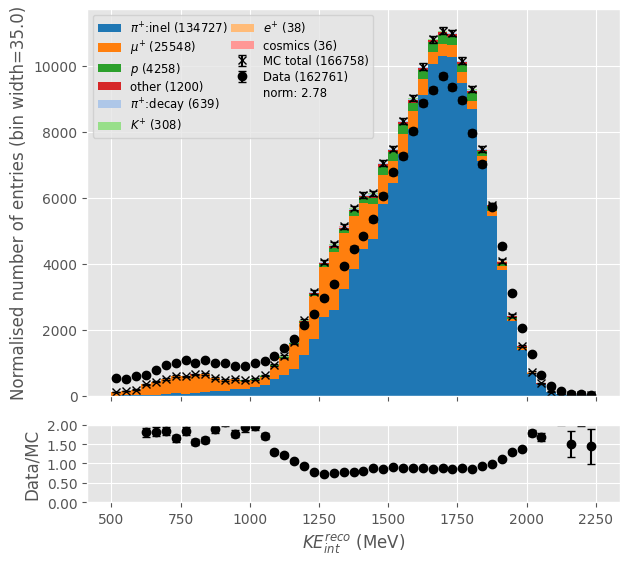

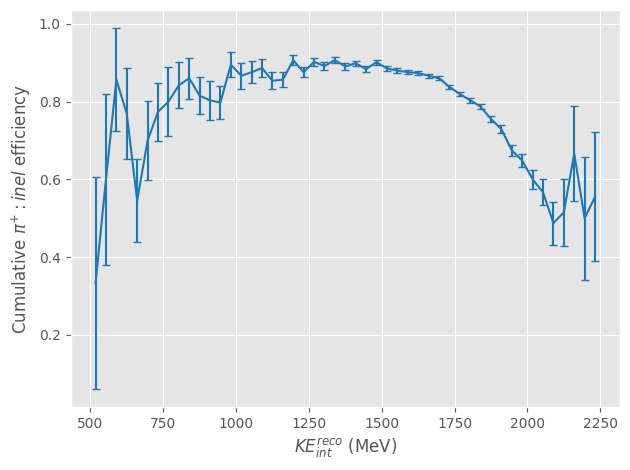

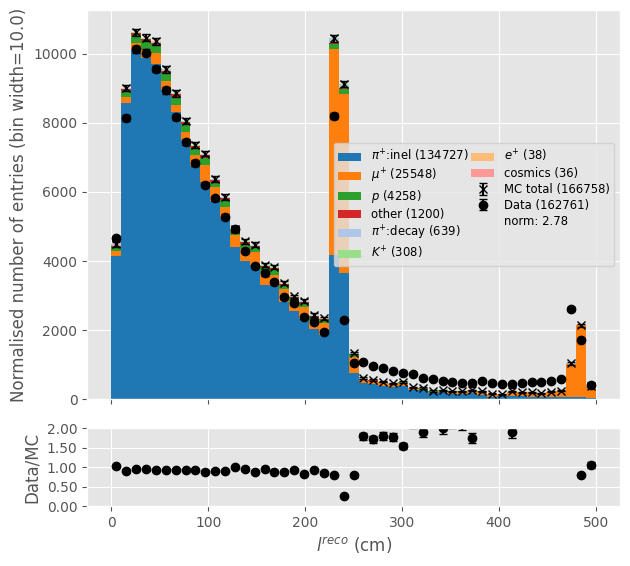

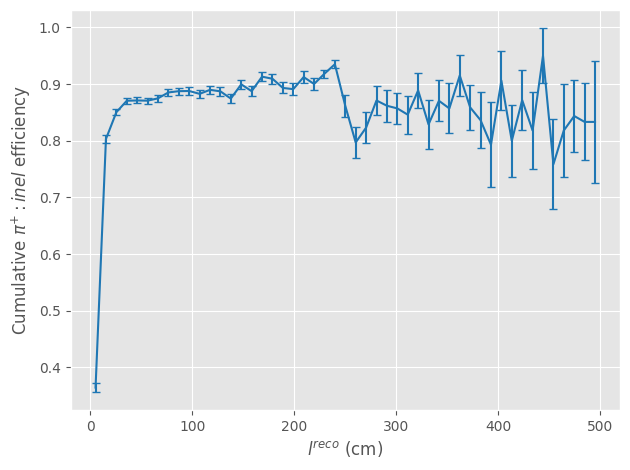

APA3Cut <function APA3Cut at 0x7fce3043e9e0>

mc 59985 48795

data 162761 124320

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1176: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1177: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1176: RuntimeWarning: invalid value encountered in divide
  ratio = h_data / h_mc # data / MC


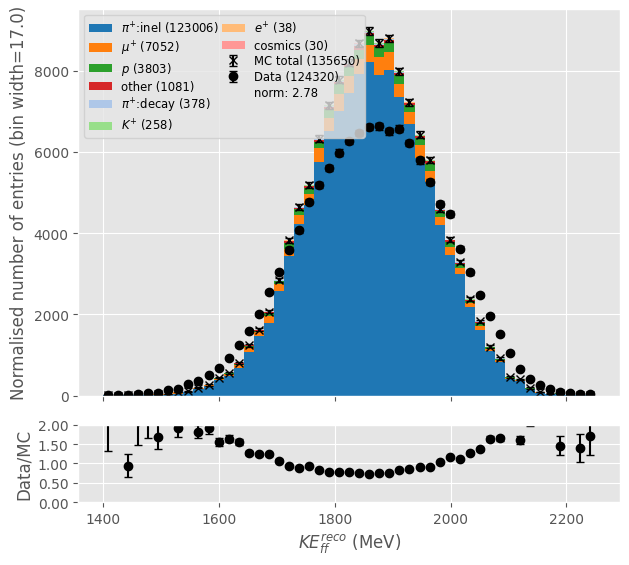

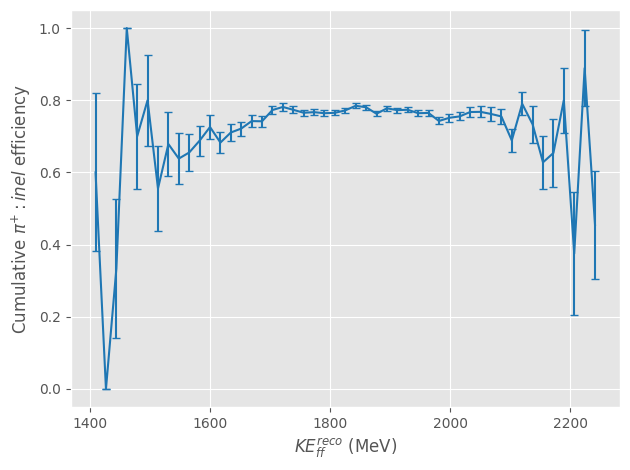

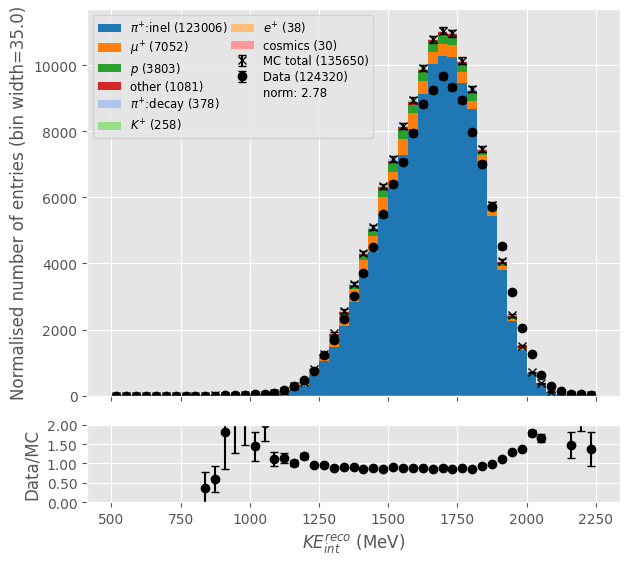

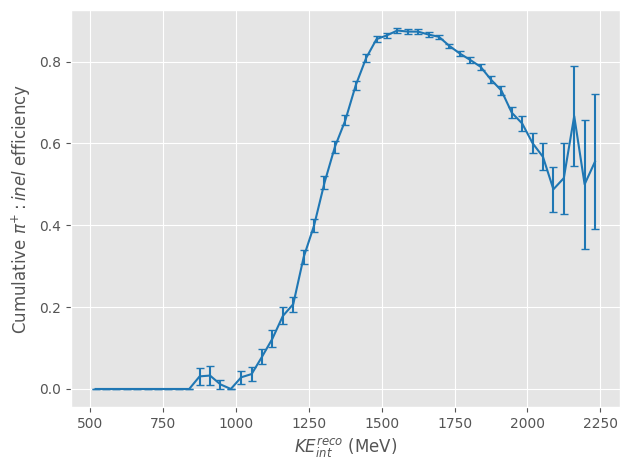

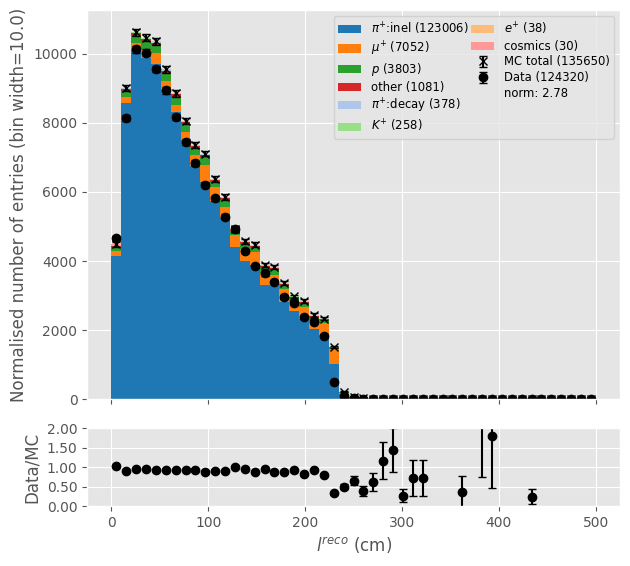

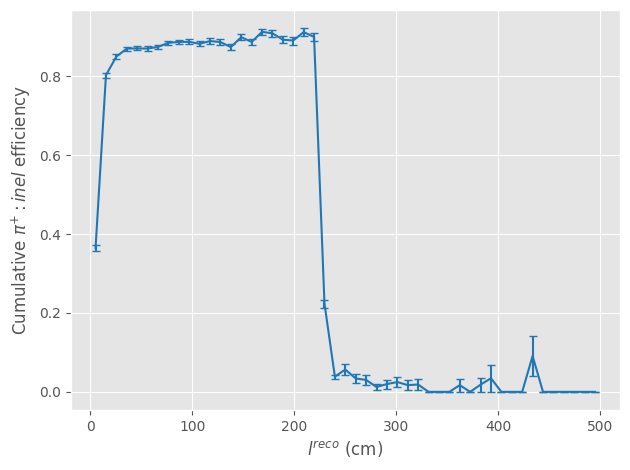

MichelScoreCut <function MichelScoreCut at 0x7fce3043ea70>

/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


mc 48795 48575

data 124320 123883

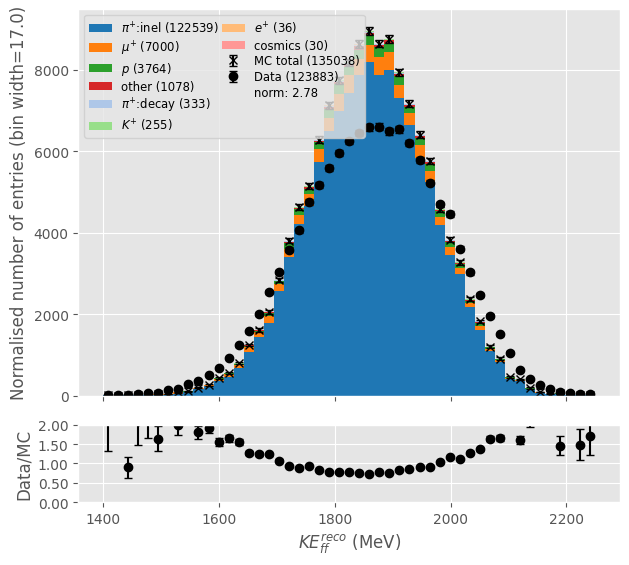

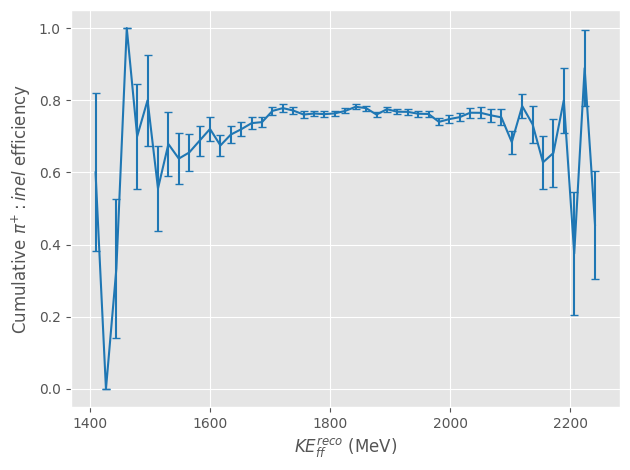

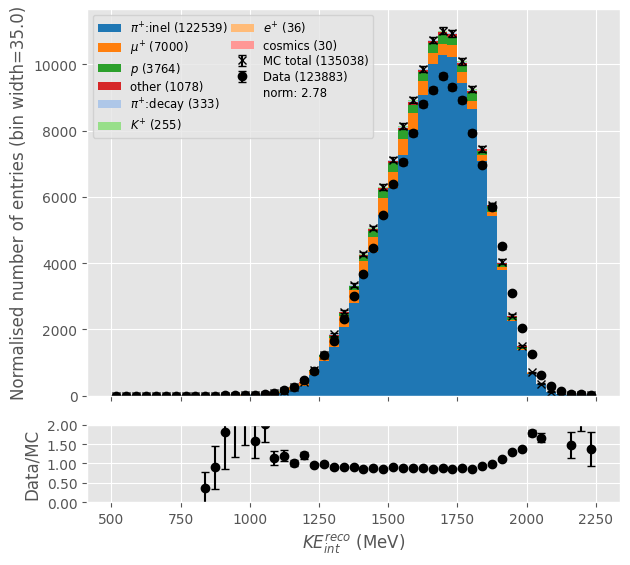

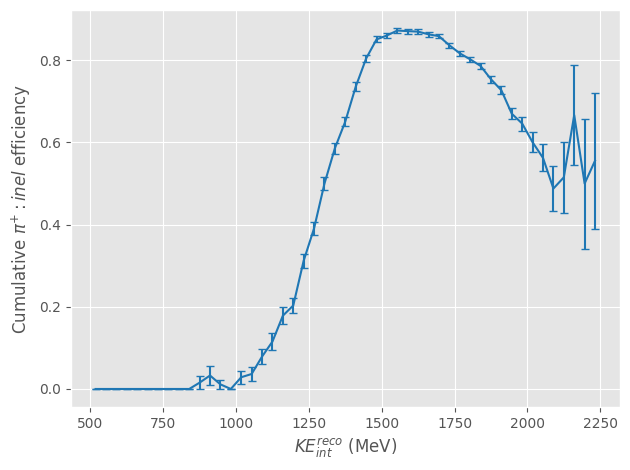

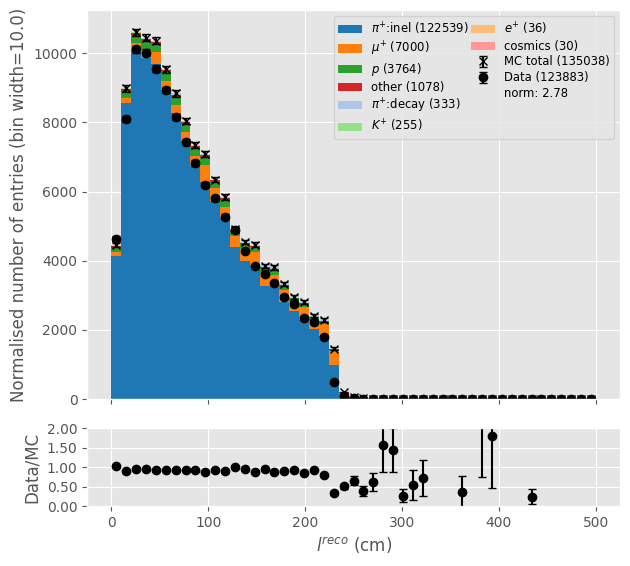

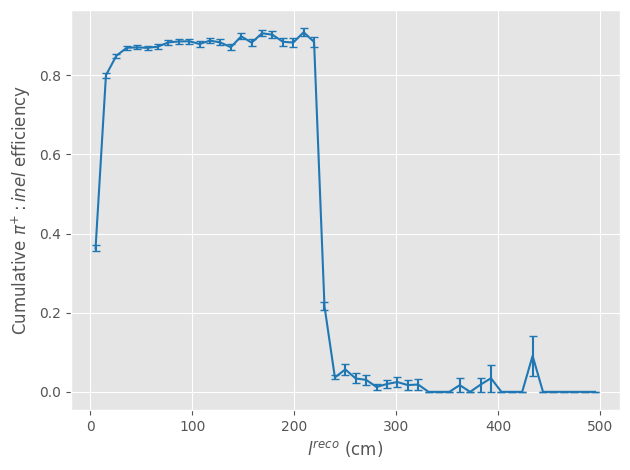

MedianDEdXCut <function MedianDEdXCut at 0x7fce3043eb00>

mc 48575 46726

data 123883 117662

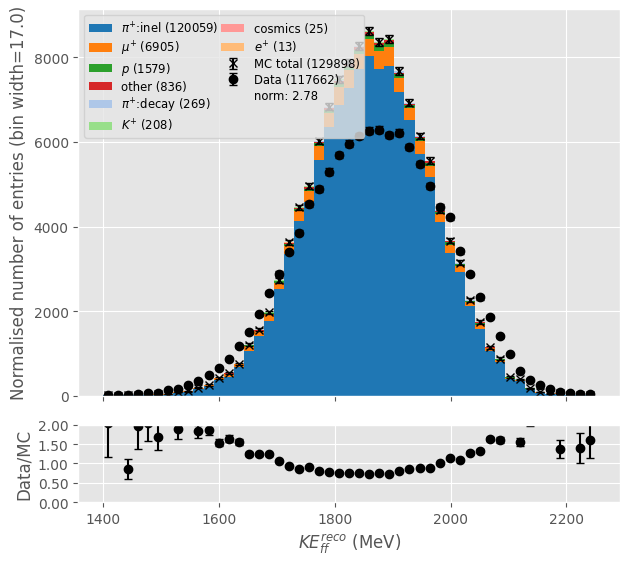

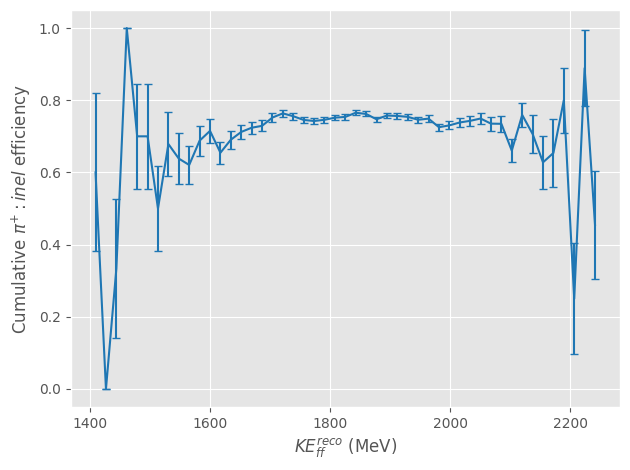

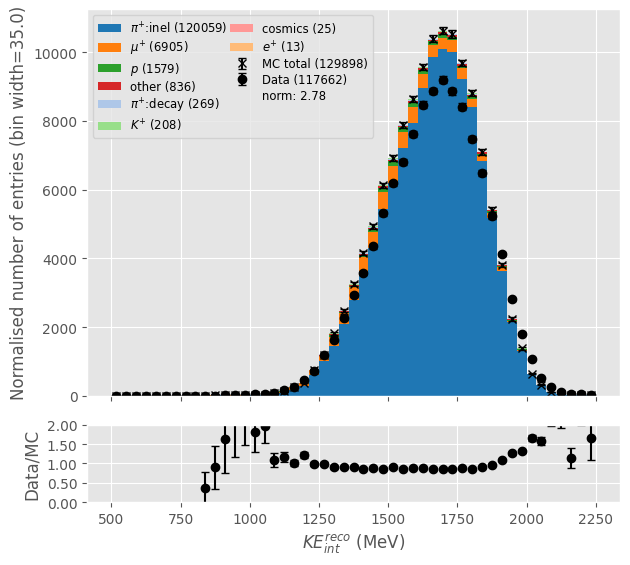

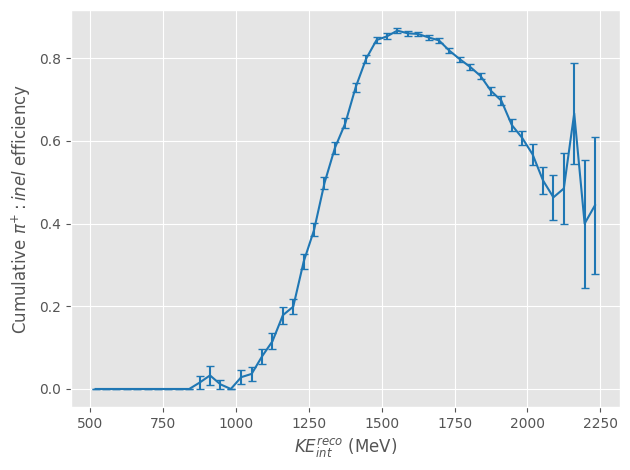

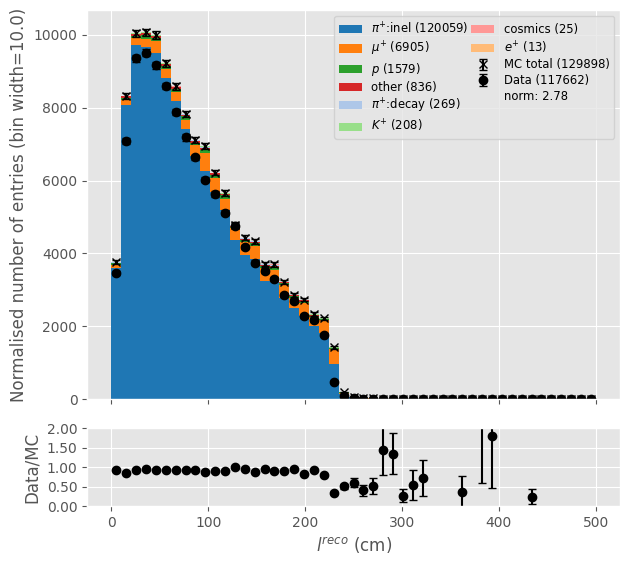

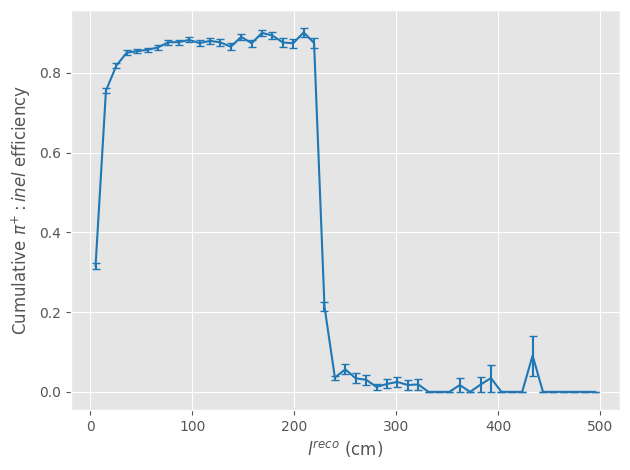

BeamScraperCut <function BeamScraperCut at 0x7fce3043eb90>

mc 46726 30016

data 117662 74649

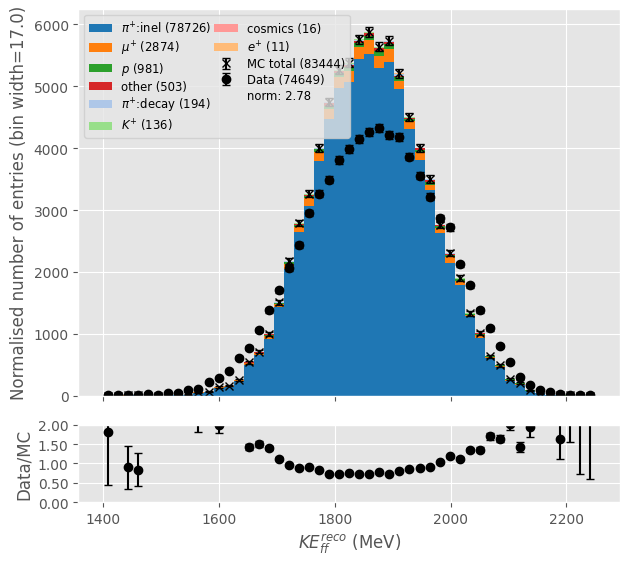

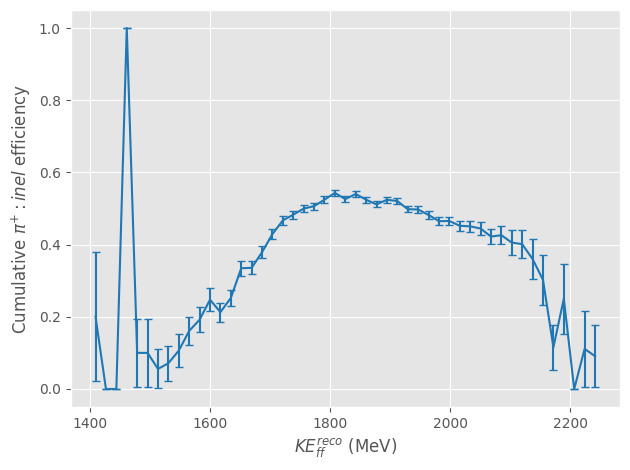

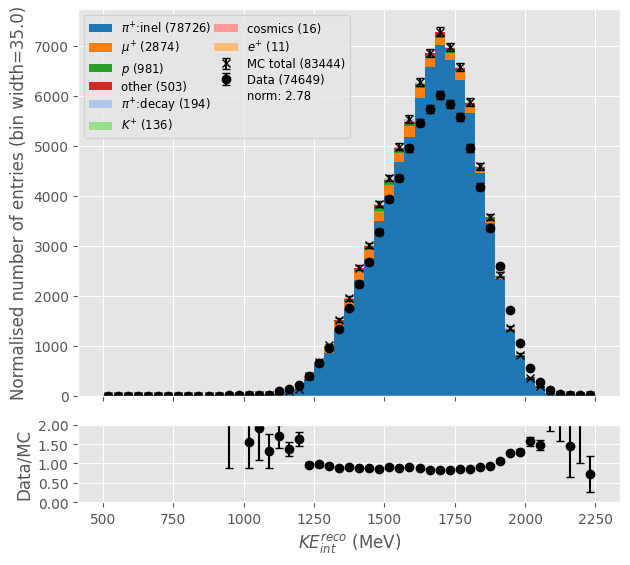

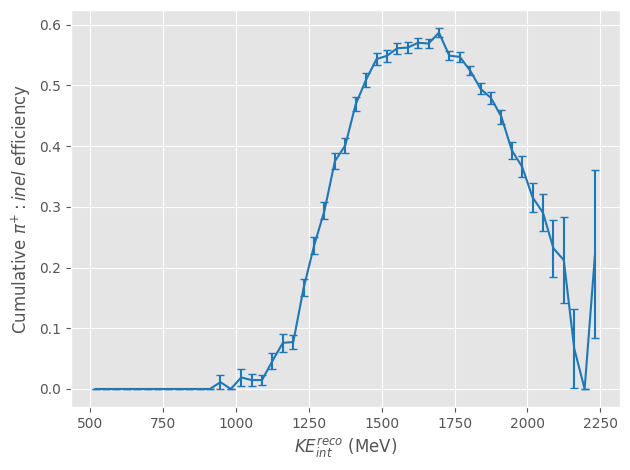

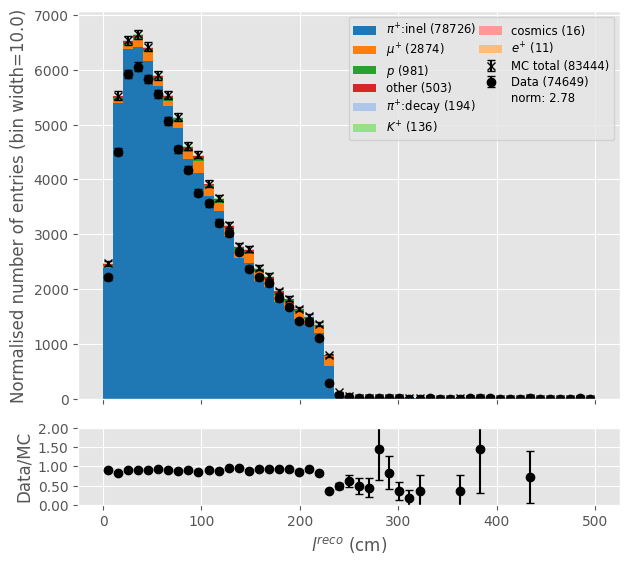

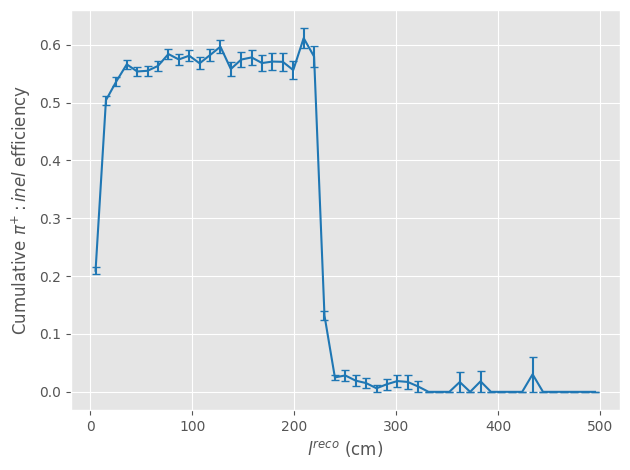

In [5]:
def FilterSamples(samples, mask):
    if type(samples["mc"]) == Master.Data:
        for s in samples:
            samples[s].Filter([mask[s]], [mask[s]])
    else:
        for s in samples:
            samples[s] = samples[s][mask[s]]

def Efficiency(selected_count : np.array, total_count : np.array) -> tuple[np.array, np.array]:
    p = selected_count / total_count
    p = np.nan_to_num(p)
    error = (p * (1 - p) / total_count)**0.5
    return p, error


def plot_params(params : dict, initial_pion_counts : np.array, bins : np.array, tags : Tags.Tags, x_range : list, x_label : str):
    # efficiency_initial = Efficiency(np.histogram(np.array(params["mc"][mask][tags["$\\pi^{+}$:inel"].mask]), bins, range = x_range)[0], np.histogram(np.array(params[initial_pions]), bins, range = x_range)[0])
    e = Efficiency(
        np.histogram(np.array(params["mc"][tags["$\\pi^{+}$:inel"].mask]), bins, range = x_range)[0],
        initial_pion_counts
    )

    Plots.PlotTagged(params["mc"], tags, data2 = params["data"], bins = bins, x_range = x_range, x_label = x_label, norm = args.norm)
    Plots.Plot((bins[1:] + bins[:-1])/2, e[0], yerr = e[1], xlabel = x_label, ylabel = "Cumulative $\pi^{+}:inel$ efficiency")


def plot_all_params(mask : dict):
    particle_tags = Tags.GenerateTrueBeamParticleTags(samples["mc"])
    # initial_inelastic = ak.Array(particle_tags["$\\pi^{+}$:inel"].mask)
    # for p in particle_tags:
    #     particle_tags[p].mask = particle_tags[p].mask[mask["mc"]]

    for q in quantities:
        plot_params(quantities[q], initial_pion_counts[q], bins[q], particle_tags, ranges[q], labels[q])
    Plots.plt.show()

    # plot_params(reco_KE_ff, mask, initial_inelastic, particle_tags, [1400, 2250], "$KE^{reco}_{ff}$ (MeV)")
    # plot_params(reco_KE_int, mask, initial_inelastic, particle_tags, [500, 2250], "$KE^{reco}_{int}$ (MeV)")
    # plot_params(reco_track_length, mask, initial_inelastic, particle_tags, [0, 500], "$l^{reco}$ (cm)")
    # Plots.plt.show()

ranges = {
    "KE_ff" : [1400, 2250],
    "KE_int" : [500, 2250],
    "track_length" : [0, 500]
}
bins = {r : np.linspace(min(ranges[r]), max(ranges[r]), 50) for r in ranges}
labels = {
    "KE_ff" : "$KE^{reco}_{ff}$ (MeV)",
    "KE_int" : "$KE^{reco}_{int}$ (MeV)",
    "track_length" : "$l^{reco}$ (cm)"
}

def GetTotalPionCounts():
    particle_tags = Tags.GenerateTrueBeamParticleTags(samples["mc"])
    counts = {q : np.histogram(np.array(quantities[q]["mc"][particle_tags["$\\pi^{+}$:inel"].mask]), bins[q], range = ranges[q])[0] for q in quantities}
    return counts

initial_pion_counts = GetTotalPionCounts()
print("no selection")
mask = {s : samples[s].eventNum > 0 for s in samples}
plot_all_params(mask)

selection_args = {"mc" : "mc_arguments", "data" : "data_arguments"}

for a in args.beam_selection["selections"]:
    print(a, args.beam_selection["selections"][a])
    mask = {s : args.beam_selection["selections"][a](samples[s], **args.beam_selection[selection_args[s]][a]) for s in samples}
    
    for s in mask:
        print(s, ak.count(mask[s]), ak.sum(mask[s]))

    for q in quantities:
        FilterSamples(quantities[q], mask)
    FilterSamples(samples, mask)
    plot_all_params(mask)

In [8]:
def CreatePFOMasks(mc : Master.Data, selections : dict, extra_args : dict = None):
    mask = None
    for c, v in zip(selections["selections"].values(), selections["mc_arguments"].values()):
        if extra_args is not None:
            v = {**v, **extra_args}
        tmp = c(mc, **v)
        if mask is None:
            mask = tmp
        else:
            mask = mask & tmp
    return mask

mask = {s : cross_section.PFOSelection.GoodShowerSelection(samples[s]) for s in samples}
if args.valid_pfo_selection:
        FilterSamples(samples, mask)

photons = {}
piplus = {}
pi0s = {}
for s in samples:
    photons[s] = CreatePFOMasks(samples[s], args.photon_selection)
    piplus[s] = CreatePFOMasks(samples[s], args.piplus_selection)
    pi0s[s] = CreatePFOMasks(samples[s], args.pi0_selection, {"photon_mask" : photons[s]})

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _TrueParticleData__pdg.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _TrueParticleData__number.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_inst_P.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_calo_pos.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analys

[50, 250]


no truth information found, sorting showers by reco energy instead

[50, 250]


no truth information found, sorting showers by reco energy instead

In [10]:
def FitlerTags(tags, mask):
    for r in tags:
        tags[r].mask = tags[r].mask & mask
    return tags

def UpdateTags(tags, mask):
    for r in tags:
        tags[r].mask = tags[r].mask[mask]
    return tags

regions = {s : cross_section.EventSelection.create_regions(ak.sum(pi0s[s], axis = -1), ak.sum(piplus[s], axis = -1)) for s in samples} # plot varaibles stacked in regions
# regions.pop("pion_prod_>1_pi0")

In [28]:
def PlotInRegions(param, regions, bins, x_range, x_label, stacked : bool = True, norm : bool = True, blind : bool = True):
    for _, r in Plots.IterMultiPlot(regions["mc"], sharex = True, sharey = True):
        tags = UpdateTags(cross_section.EventSelection.GenerateTrueFinalStateTags(samples["mc"]), regions["mc"][r])
        if stacked is True:
            histtype = "bar"
        else:
            histtype = "step"
        Plots.PlotTagged(param["mc"][regions["mc"][r]], tags, data2 = None if blind else param["data"][regions["data"][r]], title = r, newFigure = False, stacked = stacked, bins = bins, histtype = histtype, x_label = x_label, x_range = x_range, norm = norm, ncols = 1)


def PlotTaggedNormalisedError(param, regions, bins, range, label, blind : bool = True):
    for _, r in Plots.IterMultiPlot(regions["mc"]):
        tags = UpdateTags(cross_section.EventSelection.GenerateTrueFinalStateTags(samples["mc"]), regions["mc"][r])

        for tag in tags.values():
            counts, edges = np.histogram(np.array(param["mc"][regions["mc"][r]][tag.mask]), bins = bins, range = range, density = False)
            centers = (edges[1:] + edges[:-1])/2

            density = counts / (sum(counts) * np.diff(edges))
            density_err = np.sqrt(counts) / (sum(counts) * np.diff(edges))

            Plots.Plot(centers, density, yerr = density_err, linestyle = "-", color = tag.colour, newFigure = False, label = tag.name, xlabel = label, title = r)
            # Plots.PlotHist(param[regions[r]][tag.mask], bins = edges, histtype = "step", color = tag.colour, newFigure = False, density = True, label = tag.name, xlabel = label, alpha = None, title = r)


def PlotSingleTaggedNormalisedError(param, regions, bins, range, label):
    tags = cross_section.EventSelection.GenerateTrueFinalStateTags(samples["mc"])
    for _, r in Plots.IterMultiPlot(regions["mc"]):
        data = [param["mc"][regions["mc"][r] & tags[r].mask], param["mc"][regions["mc"][r] & ~tags[r].mask]]
        signal, edges = np.histogram(np.array(data[0]), bins = bins, range = range, density = False)
        background, _ = np.histogram(np.array(data[1]), bins = bins, range = range, density = False)
        centers = (edges[1:] + edges[:-1])/2

        density = [signal / (sum(signal) * np.diff(edges)), background / (sum(background) * np.diff(edges))]
        density_err = [np.sqrt(signal) / (sum(signal) * np.diff(edges)), np.sqrt(background) / (sum(background) * np.diff(edges))]

        Plots.Plot(centers, density[0], yerr = density_err[0], linestyle = "", color = tags[r].colour, newFigure = False)
        Plots.Plot(centers, density[1], yerr = density_err[1], linestyle = "", color = "black", newFigure = False)
        Plots.PlotHistComparison(data, labels = [tags[r].name, "other"], bins = bins, title = r, colours = [tags[r].colour, "black"], xlabel = label, newFigure = False)

/tmp/ipykernel_32150/1214775617.py:19: RuntimeWarning: invalid value encountered in divide
  density = counts / (sum(counts) * np.diff(edges))
/tmp/ipykernel_32150/1214775617.py:20: RuntimeWarning: invalid value encountered in divide
  density_err = np.sqrt(counts) / (sum(counts) * np.diff(edges))
/tmp/ipykernel_32150/1214775617.py:34: RuntimeWarning: invalid value encountered in divide
  density = [signal / (sum(signal) * np.diff(edges)), background / (sum(background) * np.diff(edges))]
/tmp/ipykernel_32150/1214775617.py:35: RuntimeWarning: invalid value encountered in divide
  density_err = [np.sqrt(signal) / (sum(signal) * np.diff(edges)), np.sqrt(background) / (sum(background) * np.diff(edges))]


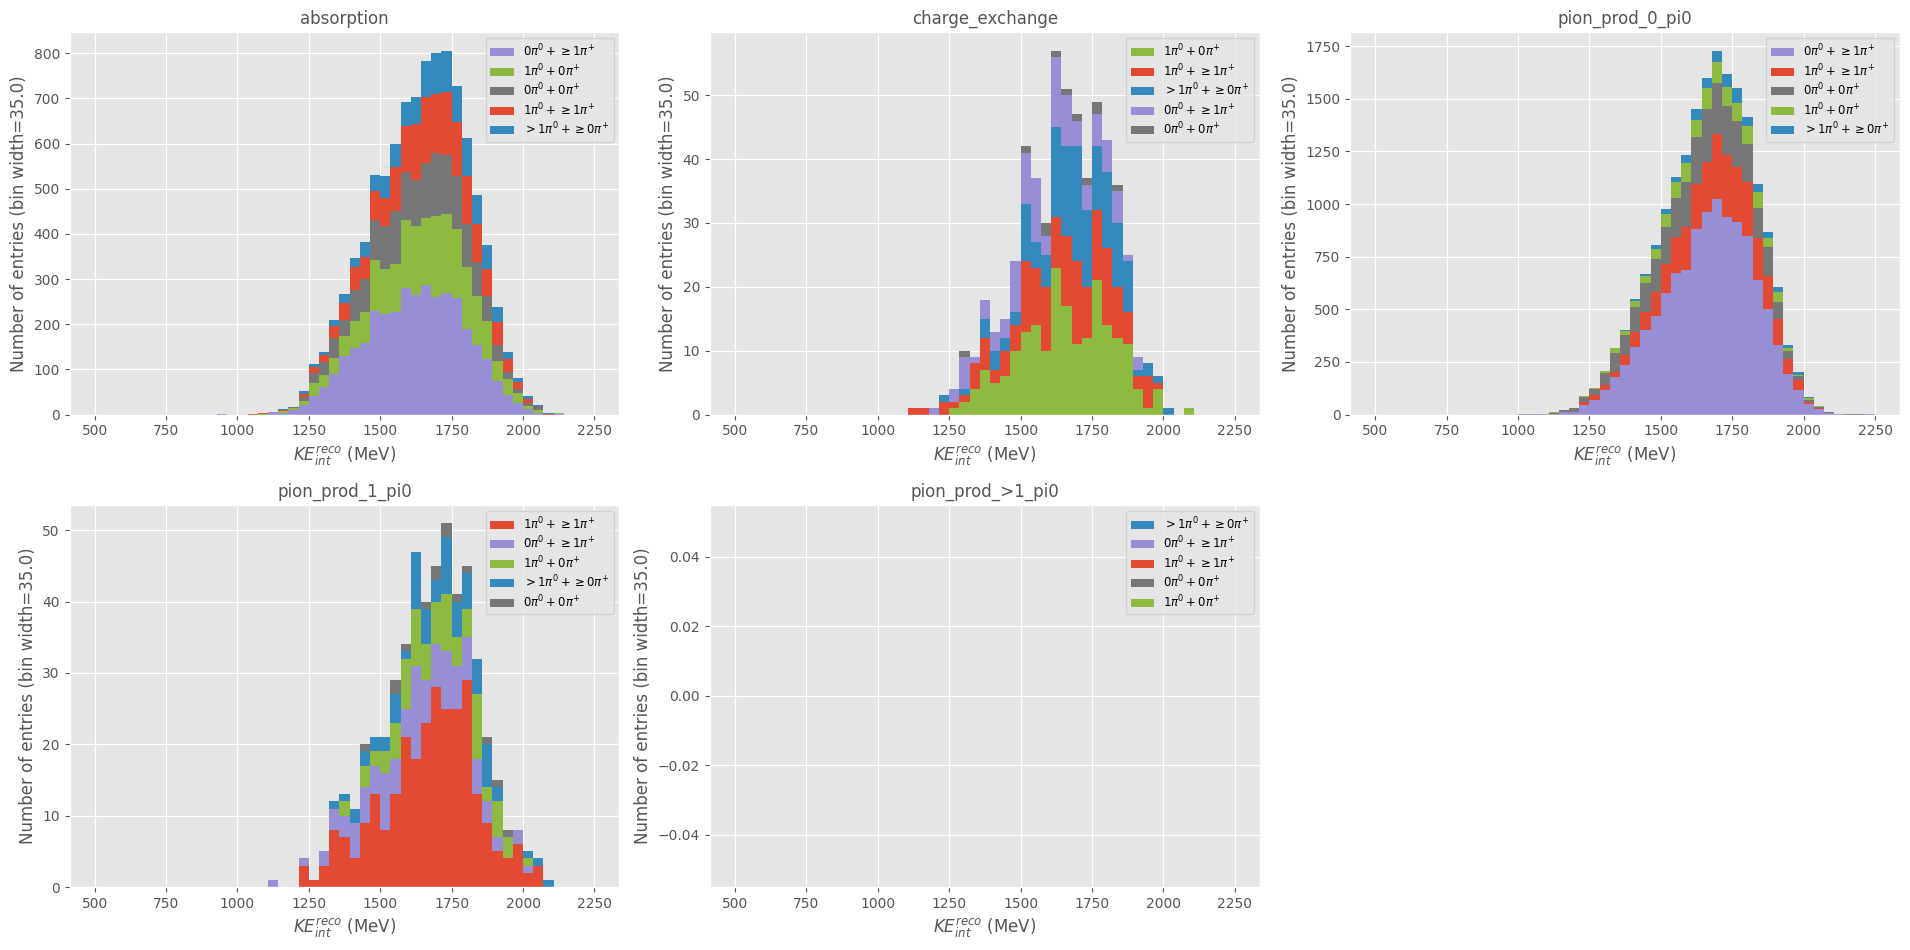

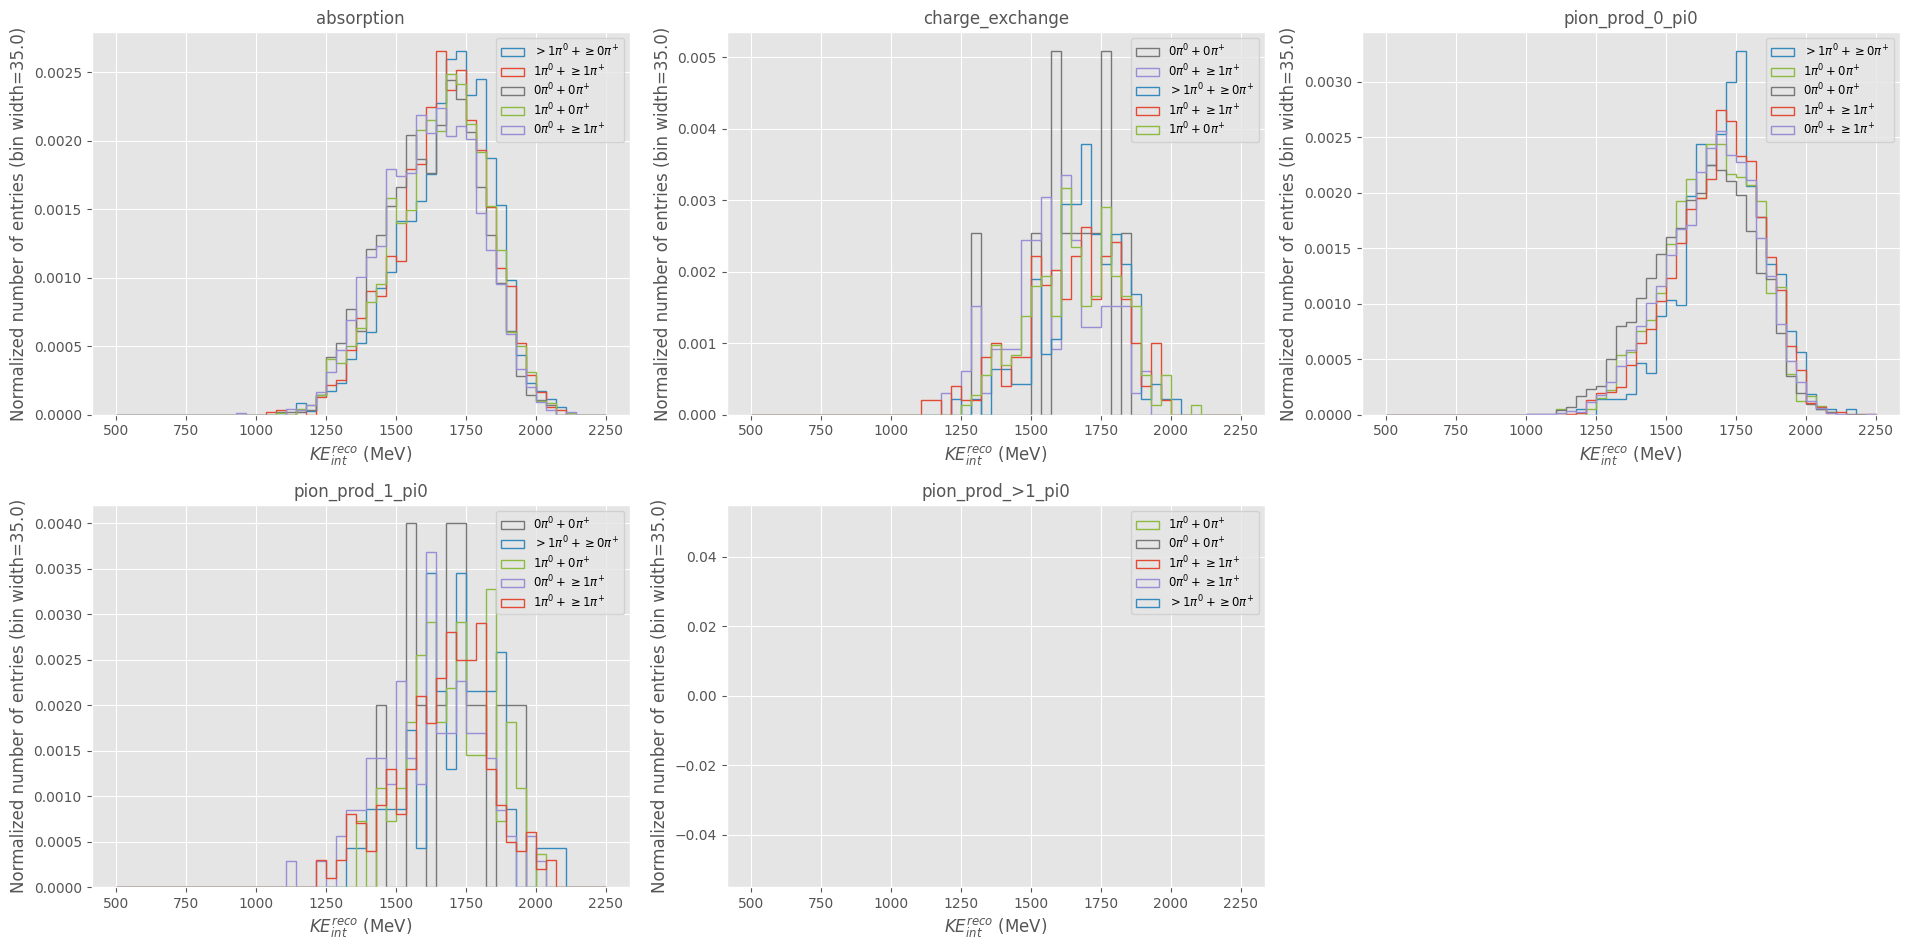

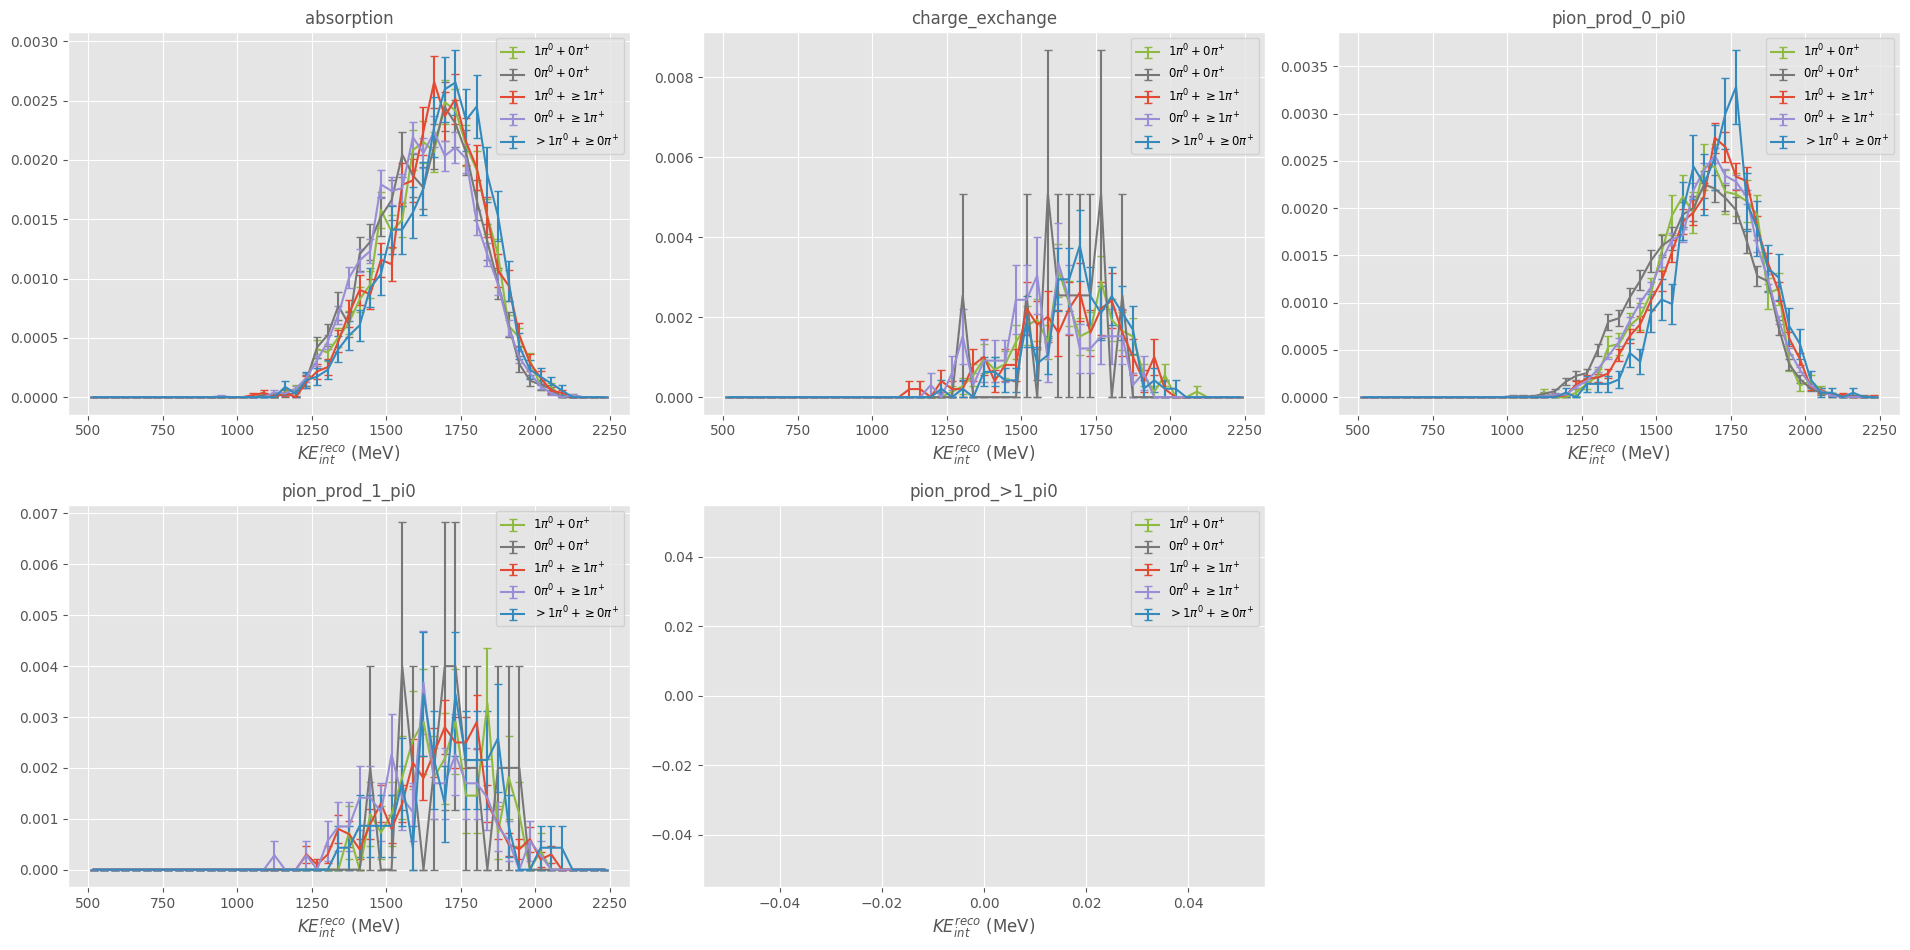

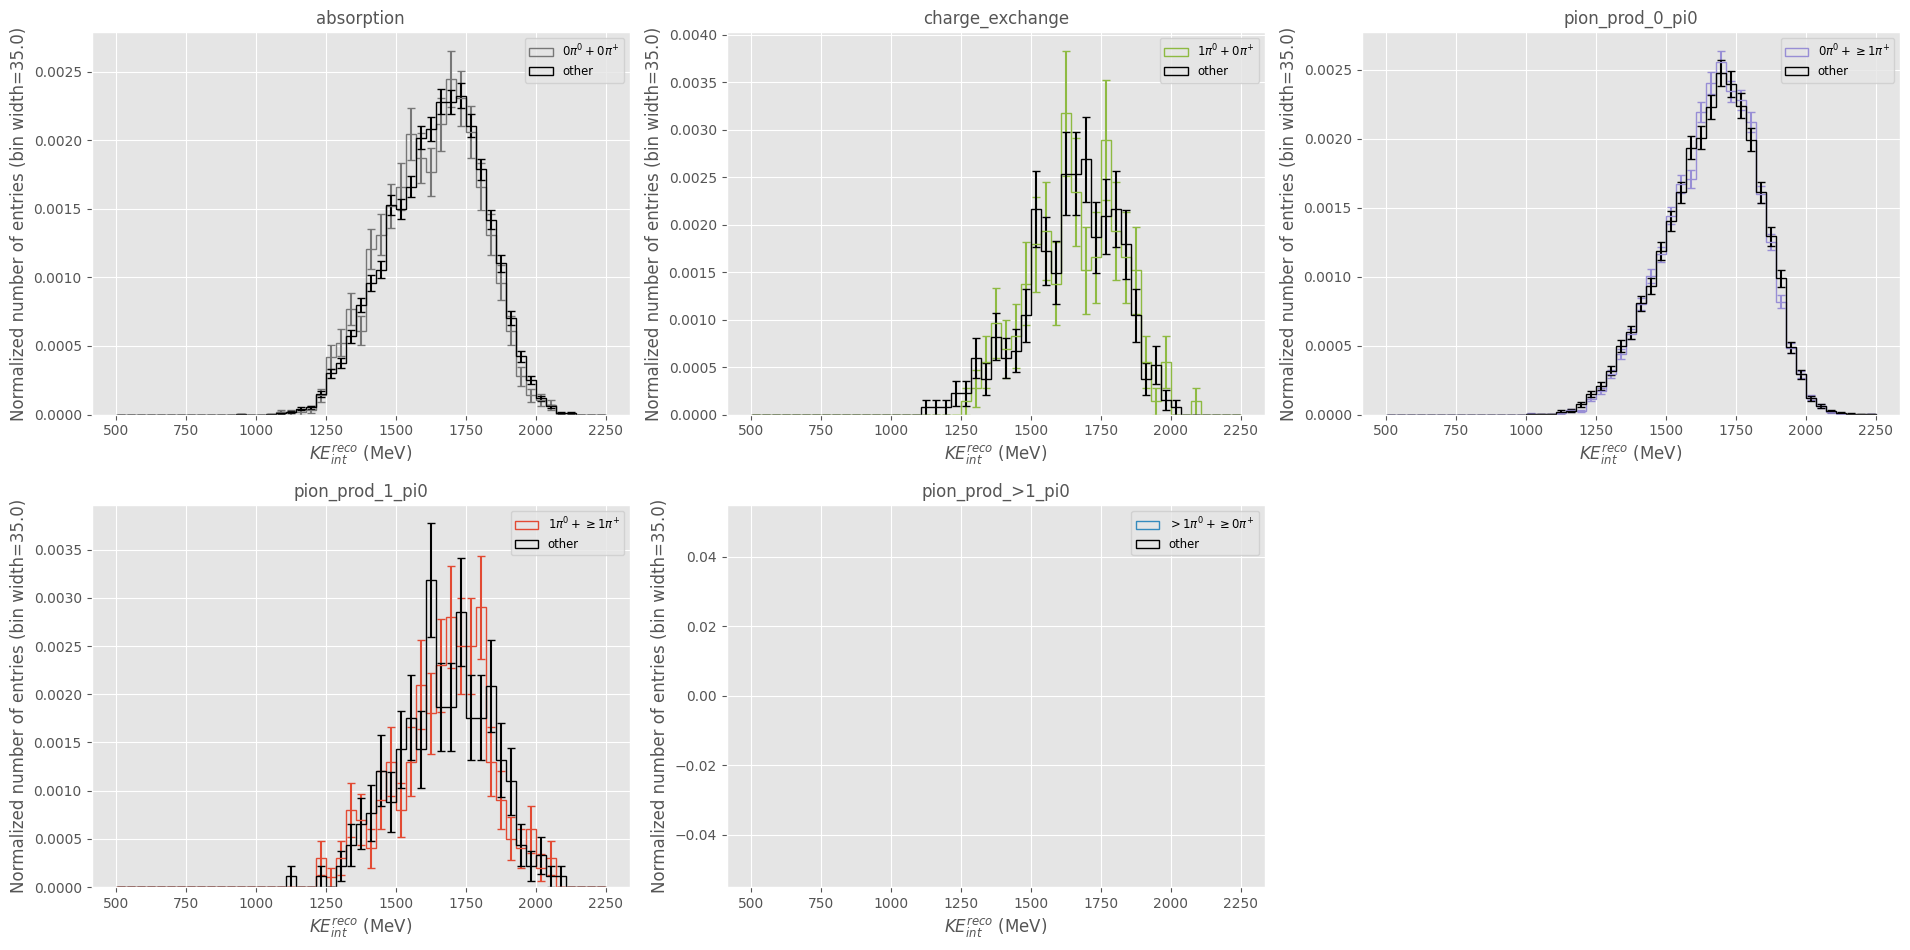

In [29]:
PlotInRegions(quantities["KE_int"], regions, bins["KE_int"], ranges["KE_int"], labels["KE_int"], stacked = True, norm = False, blind = True)
PlotInRegions(quantities["KE_int"], regions, bins["KE_int"], ranges["KE_int"], labels["KE_int"], stacked = False, norm = True, blind = True)
PlotTaggedNormalisedError(quantities["KE_int"], regions, bins["KE_int"], ranges["KE_int"], labels["KE_int"])
PlotSingleTaggedNormalisedError(quantities["KE_int"], regions, bins["KE_int"], ranges["KE_int"], labels["KE_int"])

charge_exchange

signal_yields: {'A': 3432, 'B': 4713, 'C': 5090, 'D': 15014}

observed_yields : {'A': 578, 'B': 9719, 'C': 535, 'D': 19184}

['mu_b', 'mu', 'tau_B', 'tau_C', 'systematic_uncertainty']

[[5.13087500e+01 5.63136561e-01]
 [3.90641050e+02 1.36105650e+01]
 [1.79289594e+02 1.73750198e+01]
 [1.89718073e+00 2.54236510e-02]
 [0.00000000e+00 9.93346829e-01]]

[51.30874999  0.56313656]

[390.64104996  13.61056499]

[0.67584957 0.02354769]

absorption

signal_yields: {'A': 4713, 'B': 3432, 'C': 5090, 'D': 15014}

observed_yields : {'A': 9719, 'B': 578, 'C': 535, 'D': 19184}

['mu_b', 'mu', 'tau_B', 'tau_C', 'systematic_uncertainty']

[[ 2.21523811e-01  6.13010476e-03]
 [ 3.89518879e+03  3.75467893e+01]
 [ 1.79289717e+02  2.77292449e+00]
 [ 1.65951557e+02  2.59853747e+00]
 [-3.70508047e-11  9.93368637e-01]]

[0.22152381 0.0061301 ]

[3895.18879369   37.54678926]

[0.40078082 0.00386324]

pion_prod_0_pi0

signal_yields: {'A': 15014, 'B': 3432, 'C': 4713, 'D': 5090}

observed_yields : {'A': 19184, 'B': 578, 'C': 9719, 'D': 535}

['mu_b', 'mu', 'tau_B', 'tau_C', 'systematic_uncertainty']

[[1.81169853e+04 1.77034124e+02]
 [1.06760262e+03 1.17462969e+02]
 [1.84377571e-02 2.31587762e-03]
 [5.17937143e-01 6.74666224e-03]
 [0.00000000e+00 9.93346719e-01]]

[18116.98525423   177.03412432]

[1067.602623    117.46296943]

[0.05565068 0.00612297]

pion_prod_1_pi0

signal_yields: {'A': 5090, 'B': 3432, 'C': 4713, 'D': 15014}

observed_yields : {'A': 535, 'B': 578, 'C': 9719, 'D': 19184}

['mu_b', 'mu', 'tau_B', 'tau_C', 'systematic_uncertainty']

[[1.73164030e+02 2.12428324e+01]
 [3.61833806e+02 3.81637277e+01]
 [1.93047285e+00 2.51447337e-02]
 [5.41916230e+01 6.42906840e+00]
 [0.00000000e+00 9.93346719e-01]]

[173.16402961  21.24283243]

[361.83380581  38.16372768]

[0.67632487 0.07133407]

array([[1.73164030e+02, 2.12428324e+01],
       [3.61833806e+02, 3.81637277e+01],
       [1.93047285e+00, 2.51447337e-02],
       [5.41916230e+01, 6.42906840e+00],
       [0.00000000e+00, 9.93346719e-01]])

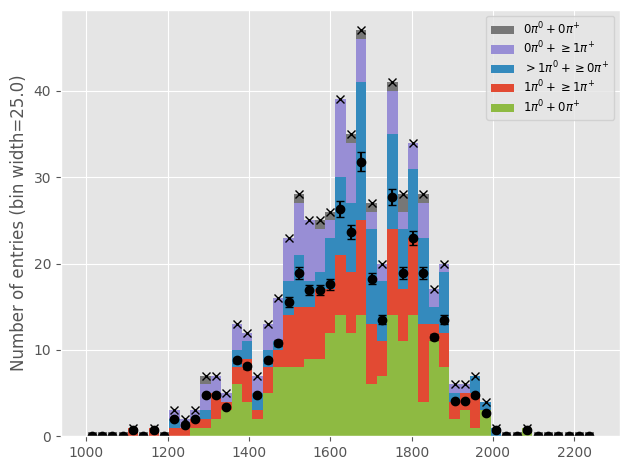

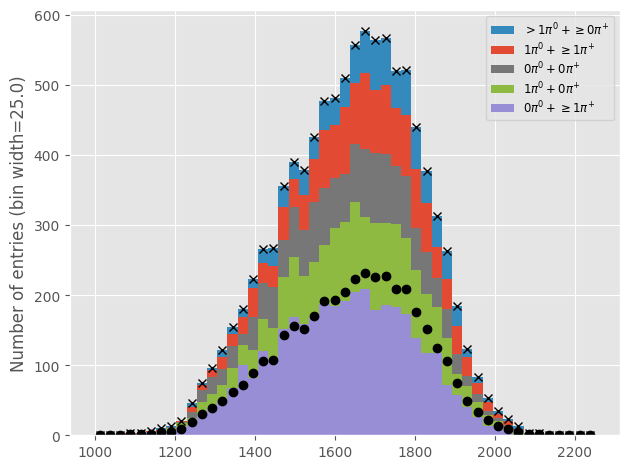

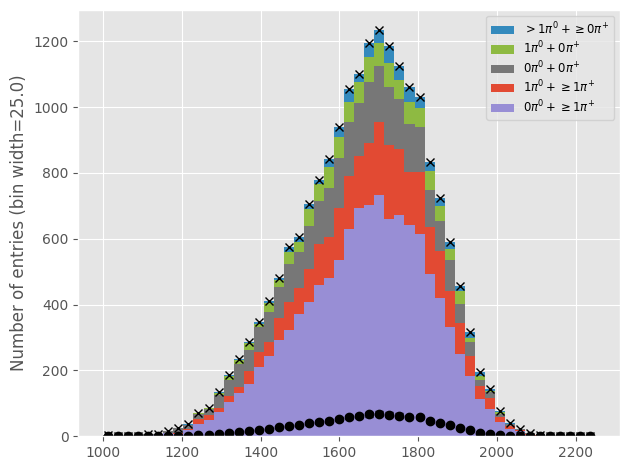

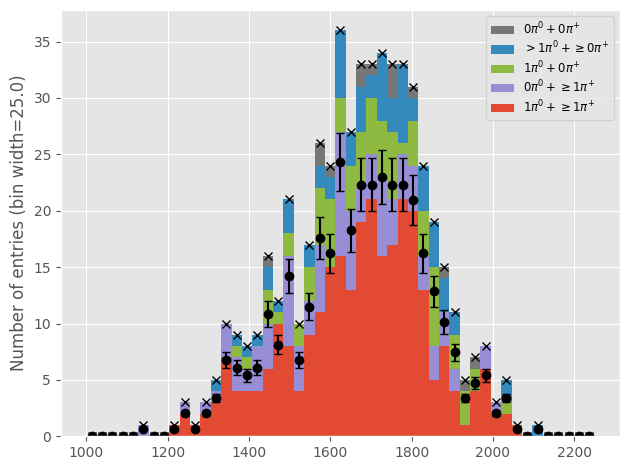

In [35]:
from abcd_pyhf import ABCD

yields = {r : sum(regions[r]) for r in regions if r != "pion_prod_>1_pi0"}

tags = cross_section.EventSelection.GenerateTrueFinalStateTags(mc)
signal_yields = {k : sum(tags[k].mask) for k in tags if k != "pion_prod_>1_pi0"}

def bkg_sub(signal_yields, observed_yields, signal):
    print(signal)
    sy = {"A" : signal_yields[signal]}
    oy = {"A" : yields[signal]}

    control_regions = list(signal_yields.keys())
    control_regions.remove(signal)
    for k, b in zip(["B", "C", "D"], control_regions):
        sy[k] = signal_yields[b]
        oy[k] = observed_yields[b]

    print(f"signal_yields: {sy}")
    print(f"observed_yields : {oy}")

    abcd = ABCD(oy, sy, 0)
    # abcd.model.spec
    print(abcd.model.config.par_names)
    result = abcd.fit()
    # result = abcd.bkg_only_fit()
    print(result)
    print(result[0])
    print(result[1])

    bins = np.linspace(1000, 2250, 50)
    scale_factor = result[1]/oy["A"]

    # scale_factor = result[0]/oy["A"]
    # scale_factor[0] = 1- scale_factor[0]
    print(scale_factor)

    tags = UpdateTags(cross_section.EventSelection.GenerateTrueFinalStateTags(mc), regions[signal])
    Plots.PlotTagged(reco_KE_int[regions[signal]], tags = tags, bins = bins, ncols = 1)

    counts, edges = np.histogram(np.array(reco_KE_int[regions[signal]]), bins = bins, range = [1000, 2250])
    centers = (edges[1:] + edges[:-1]) / 2

    Plots.Plot(centers, counts, linestyle = "", marker = "x", newFigure = False, color = "black")
    Plots.Plot(centers, counts*scale_factor[0], yerr = counts*scale_factor[1], linestyle = "", marker = "o", newFigure = False, color = "black")
    return result

bkg_sub(signal_yields, yields, "charge_exchange")
bkg_sub(signal_yields, yields, "absorption")
bkg_sub(signal_yields, yields, "pion_prod_0_pi0")
bkg_sub(signal_yields, yields, "pion_prod_1_pi0")


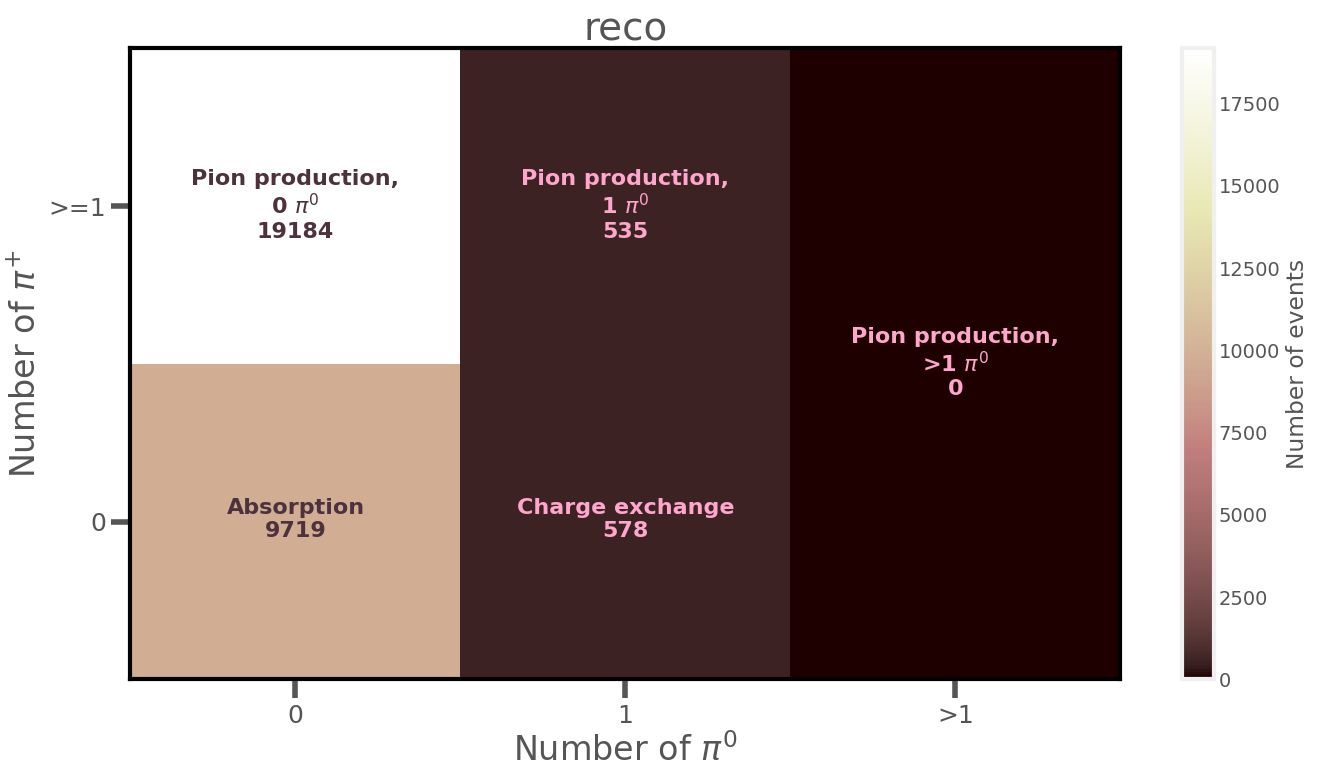

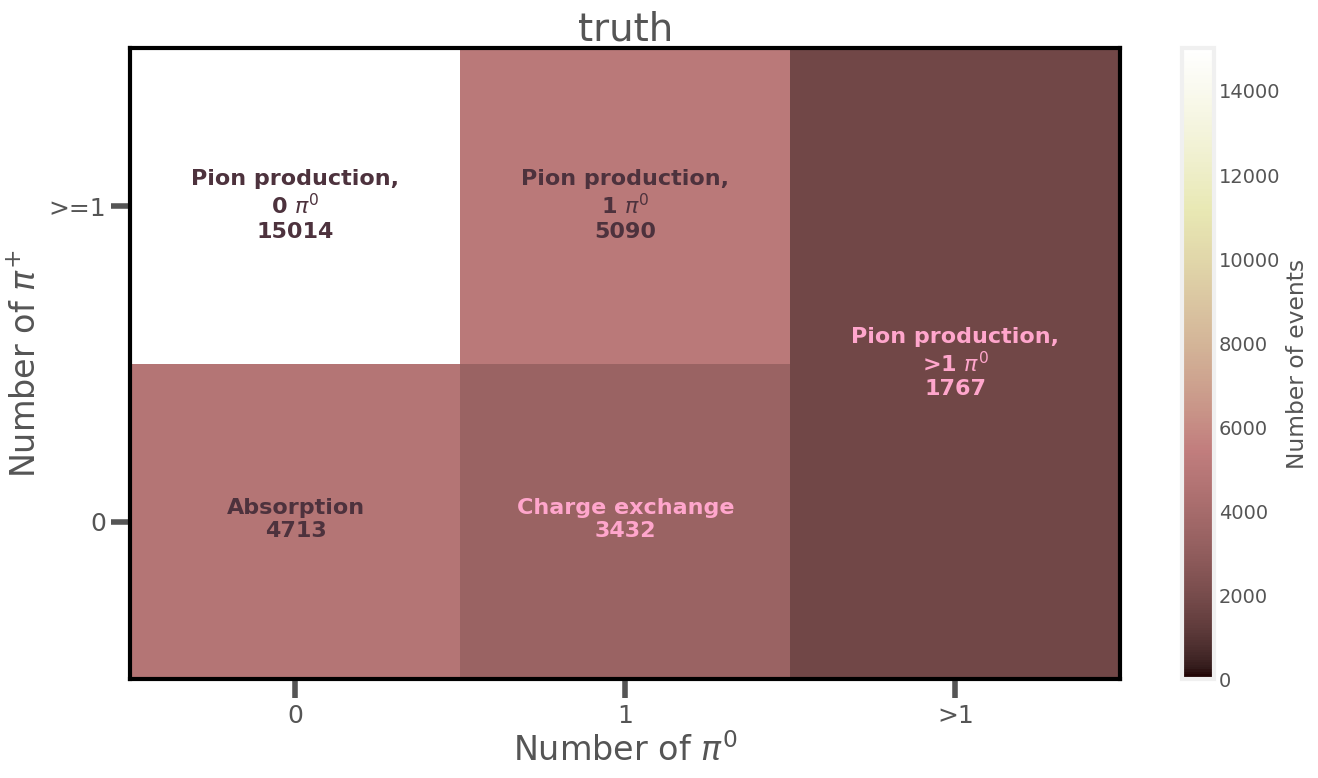

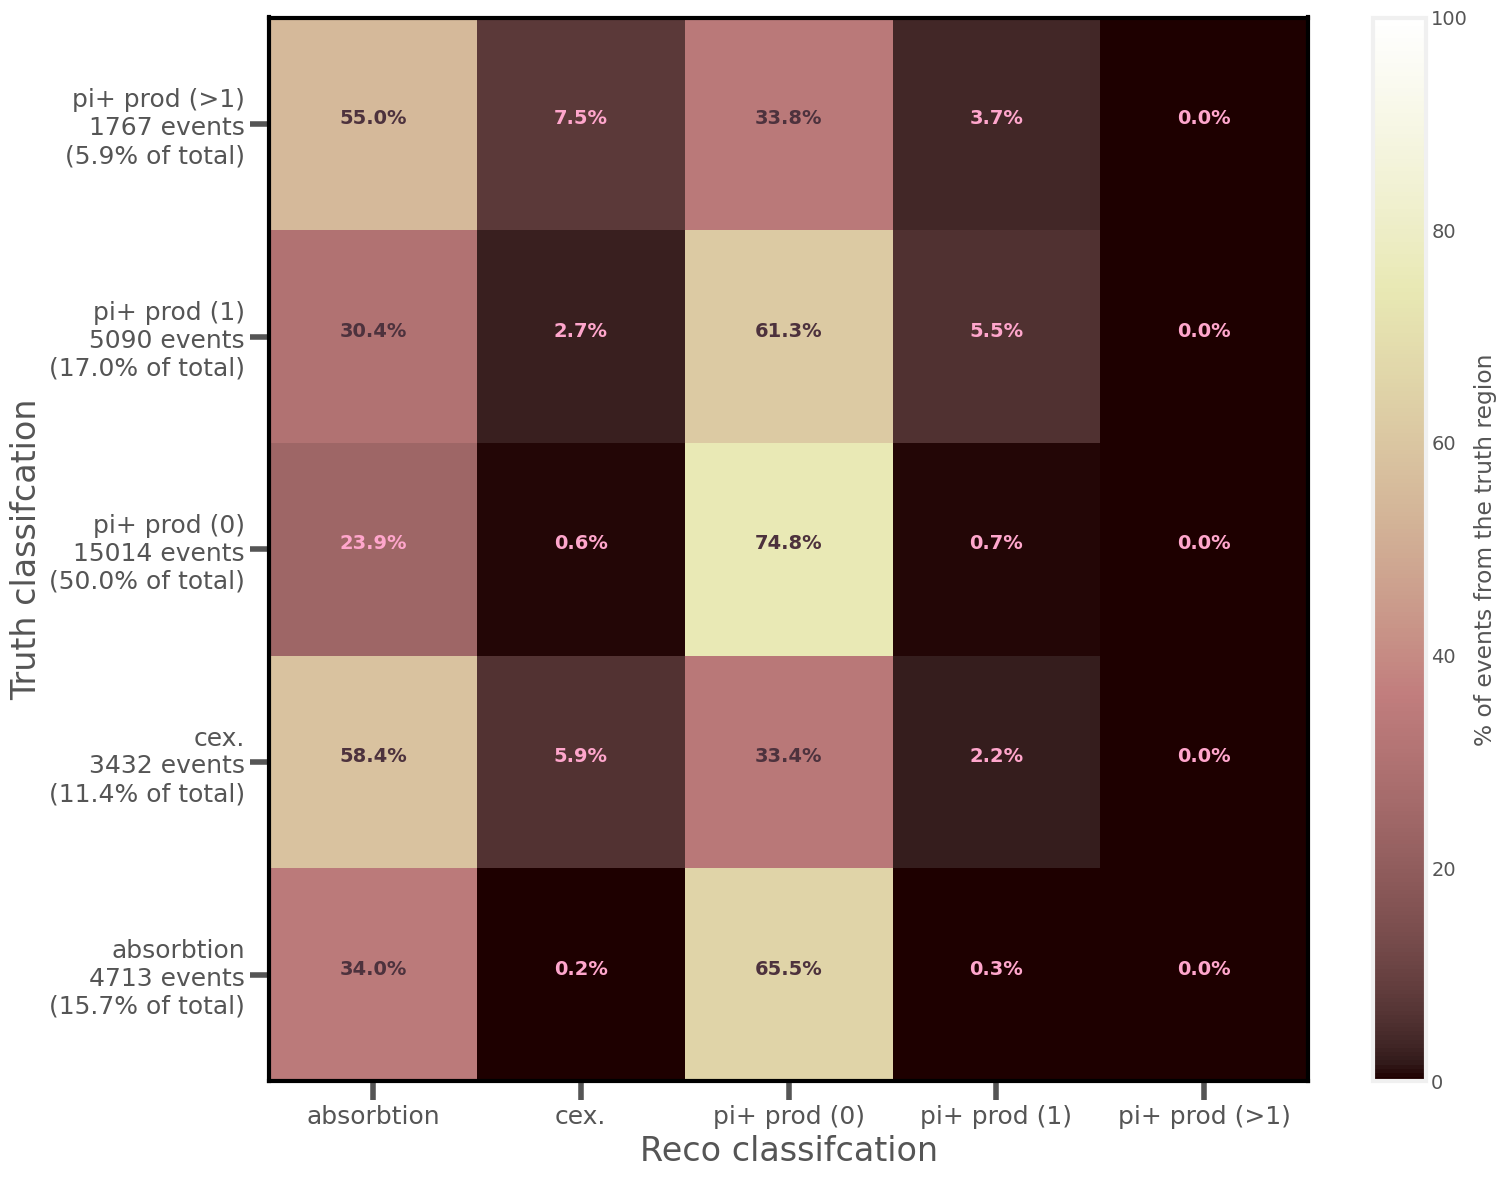

In [99]:
def PlotMatrix():
    reco_regions = cross_section.EventSelection.create_regions(ak.sum(pi0s, axis = -1), ak.sum(piplus, axis = -1)) # plot varaibles stacked in regions
    truth_regions = cross_section.EventSelection.create_regions(mc.trueParticles.nPi0, mc.trueParticles.nPiPlus)
    # truth_regions = {i : truth_regions[i] & beam_mask for i in truth_regions}
    # truth_regions = cross_section.EventSelection.create_regions(mc.trueParticles.nPi0, mc.trueParticles.nPiPlus)

    # reco_pi0_counts = cross_section.EventSelection.count_pi0_candidates(mc, exactly_two_photons = True, photon_mask = photons, correction = cross_section.EnergyCorrection.shower_energy_correction[args.correction], correction_params = cross_section.LoadConfiguration(args.correction_params))
    # reco_pi_plus_counts_mom_cut = cross_section.EventSelection.count_charged_pi_candidates(mc, energy_cut = None)
    # reco_regions = cross_section.EventSelection.create_regions(reco_pi0_counts, reco_pi_plus_counts_mom_cut)


    Plots.plot_region_data(reco_regions, title = "reco")
    Plots.plot_region_data(truth_regions, title = "truth")
    Plots.compare_truth_reco_regions(reco_regions, truth_regions)
    cross_section.SetPlotStyle(True, dpi = 100)

PlotMatrix()